In [125]:
!pip install mlxtend --upgrade --no-deps

In [126]:
import pandas as pd
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from mlxtend.evaluate import bias_variance_decomp

In [127]:
data = pk.load(open('/content/data.pkl','rb'))
data[0:5]

array([[0.00000000e+00, 2.00000000e+00],
       [1.00000000e-03, 2.02599961e+00],
       [2.00000000e-03, 2.05199691e+00],
       [3.00000000e-03, 2.07798956e+00],
       [4.00000000e-03, 2.10397524e+00]])

In [128]:
X, Y = data[:, :-1], data[:, -1]
print(X[0:5], Y[0:5])

[[0.   ]
 [0.001]
 [0.002]
 [0.003]
 [0.004]] [2.         2.02599961 2.05199691 2.07798956 2.10397524]


In [129]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.10, random_state=1)
x_train[0:5]

array([[3.15 ],
       [4.633],
       [1.783],
       [2.541],
       [2.928]])

In [130]:
x_folds = np.array_split(x_train,10)
y_folds = np.array_split(y_train,10)

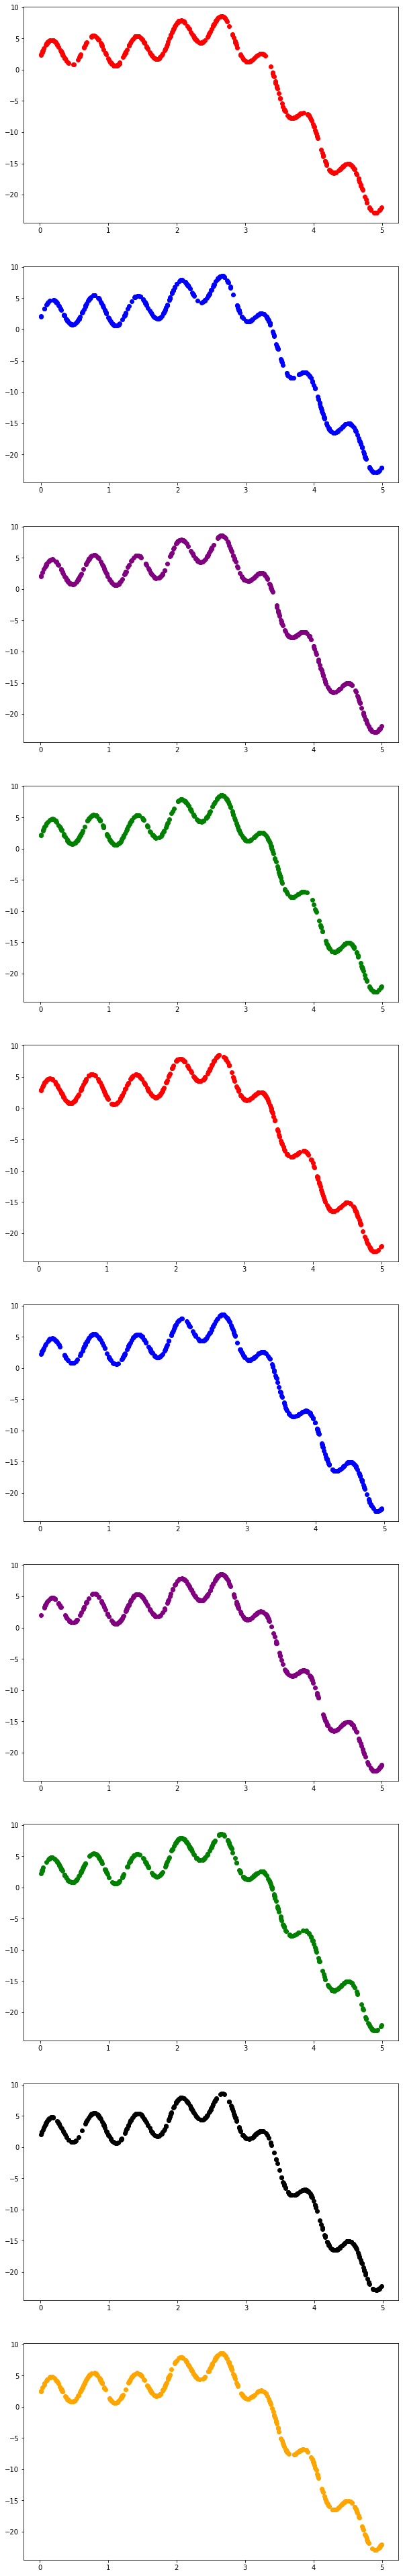

In [131]:
fig, ax = plt.subplots(10, figsize = (10, 70))
marker = ['red', 'blue', 'purple', 'green', 'red', 'blue', 'purple', 'green', 'black', 'orange']
for i in range(10):
    ax[i].scatter(x_folds[i], y_folds[i], color = marker[i])

Fold Number 1


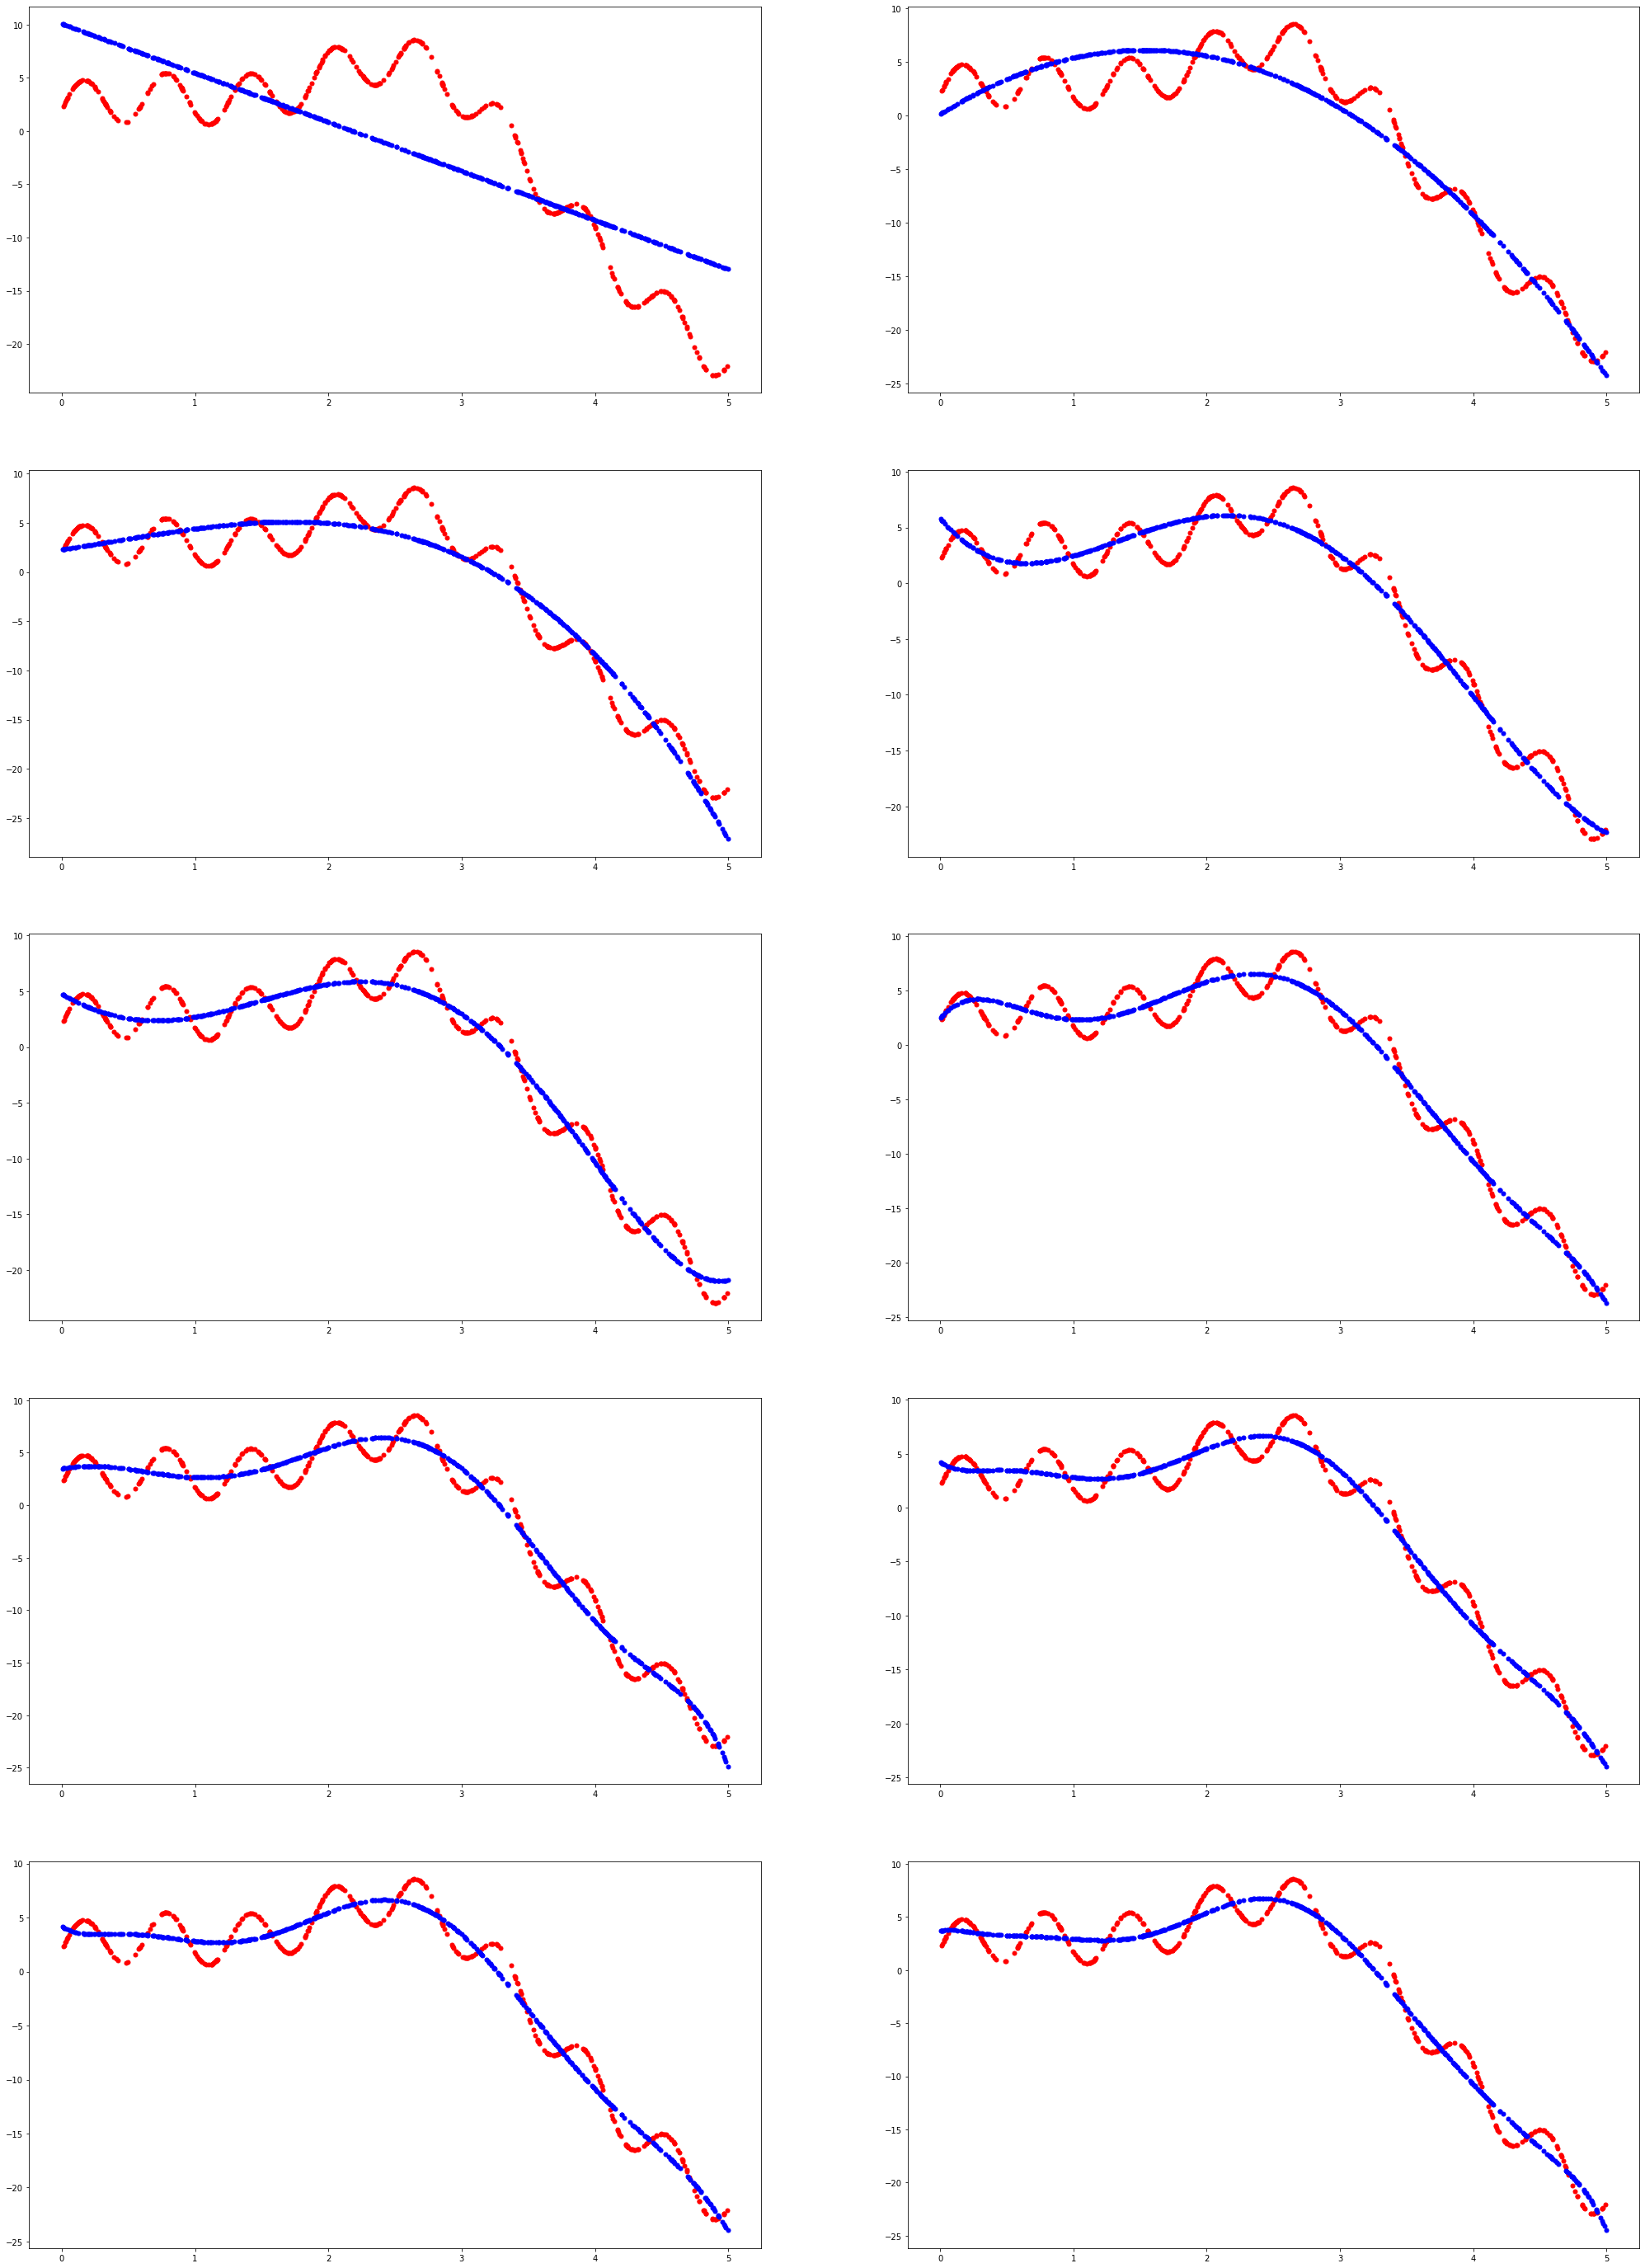

Fold Number 2


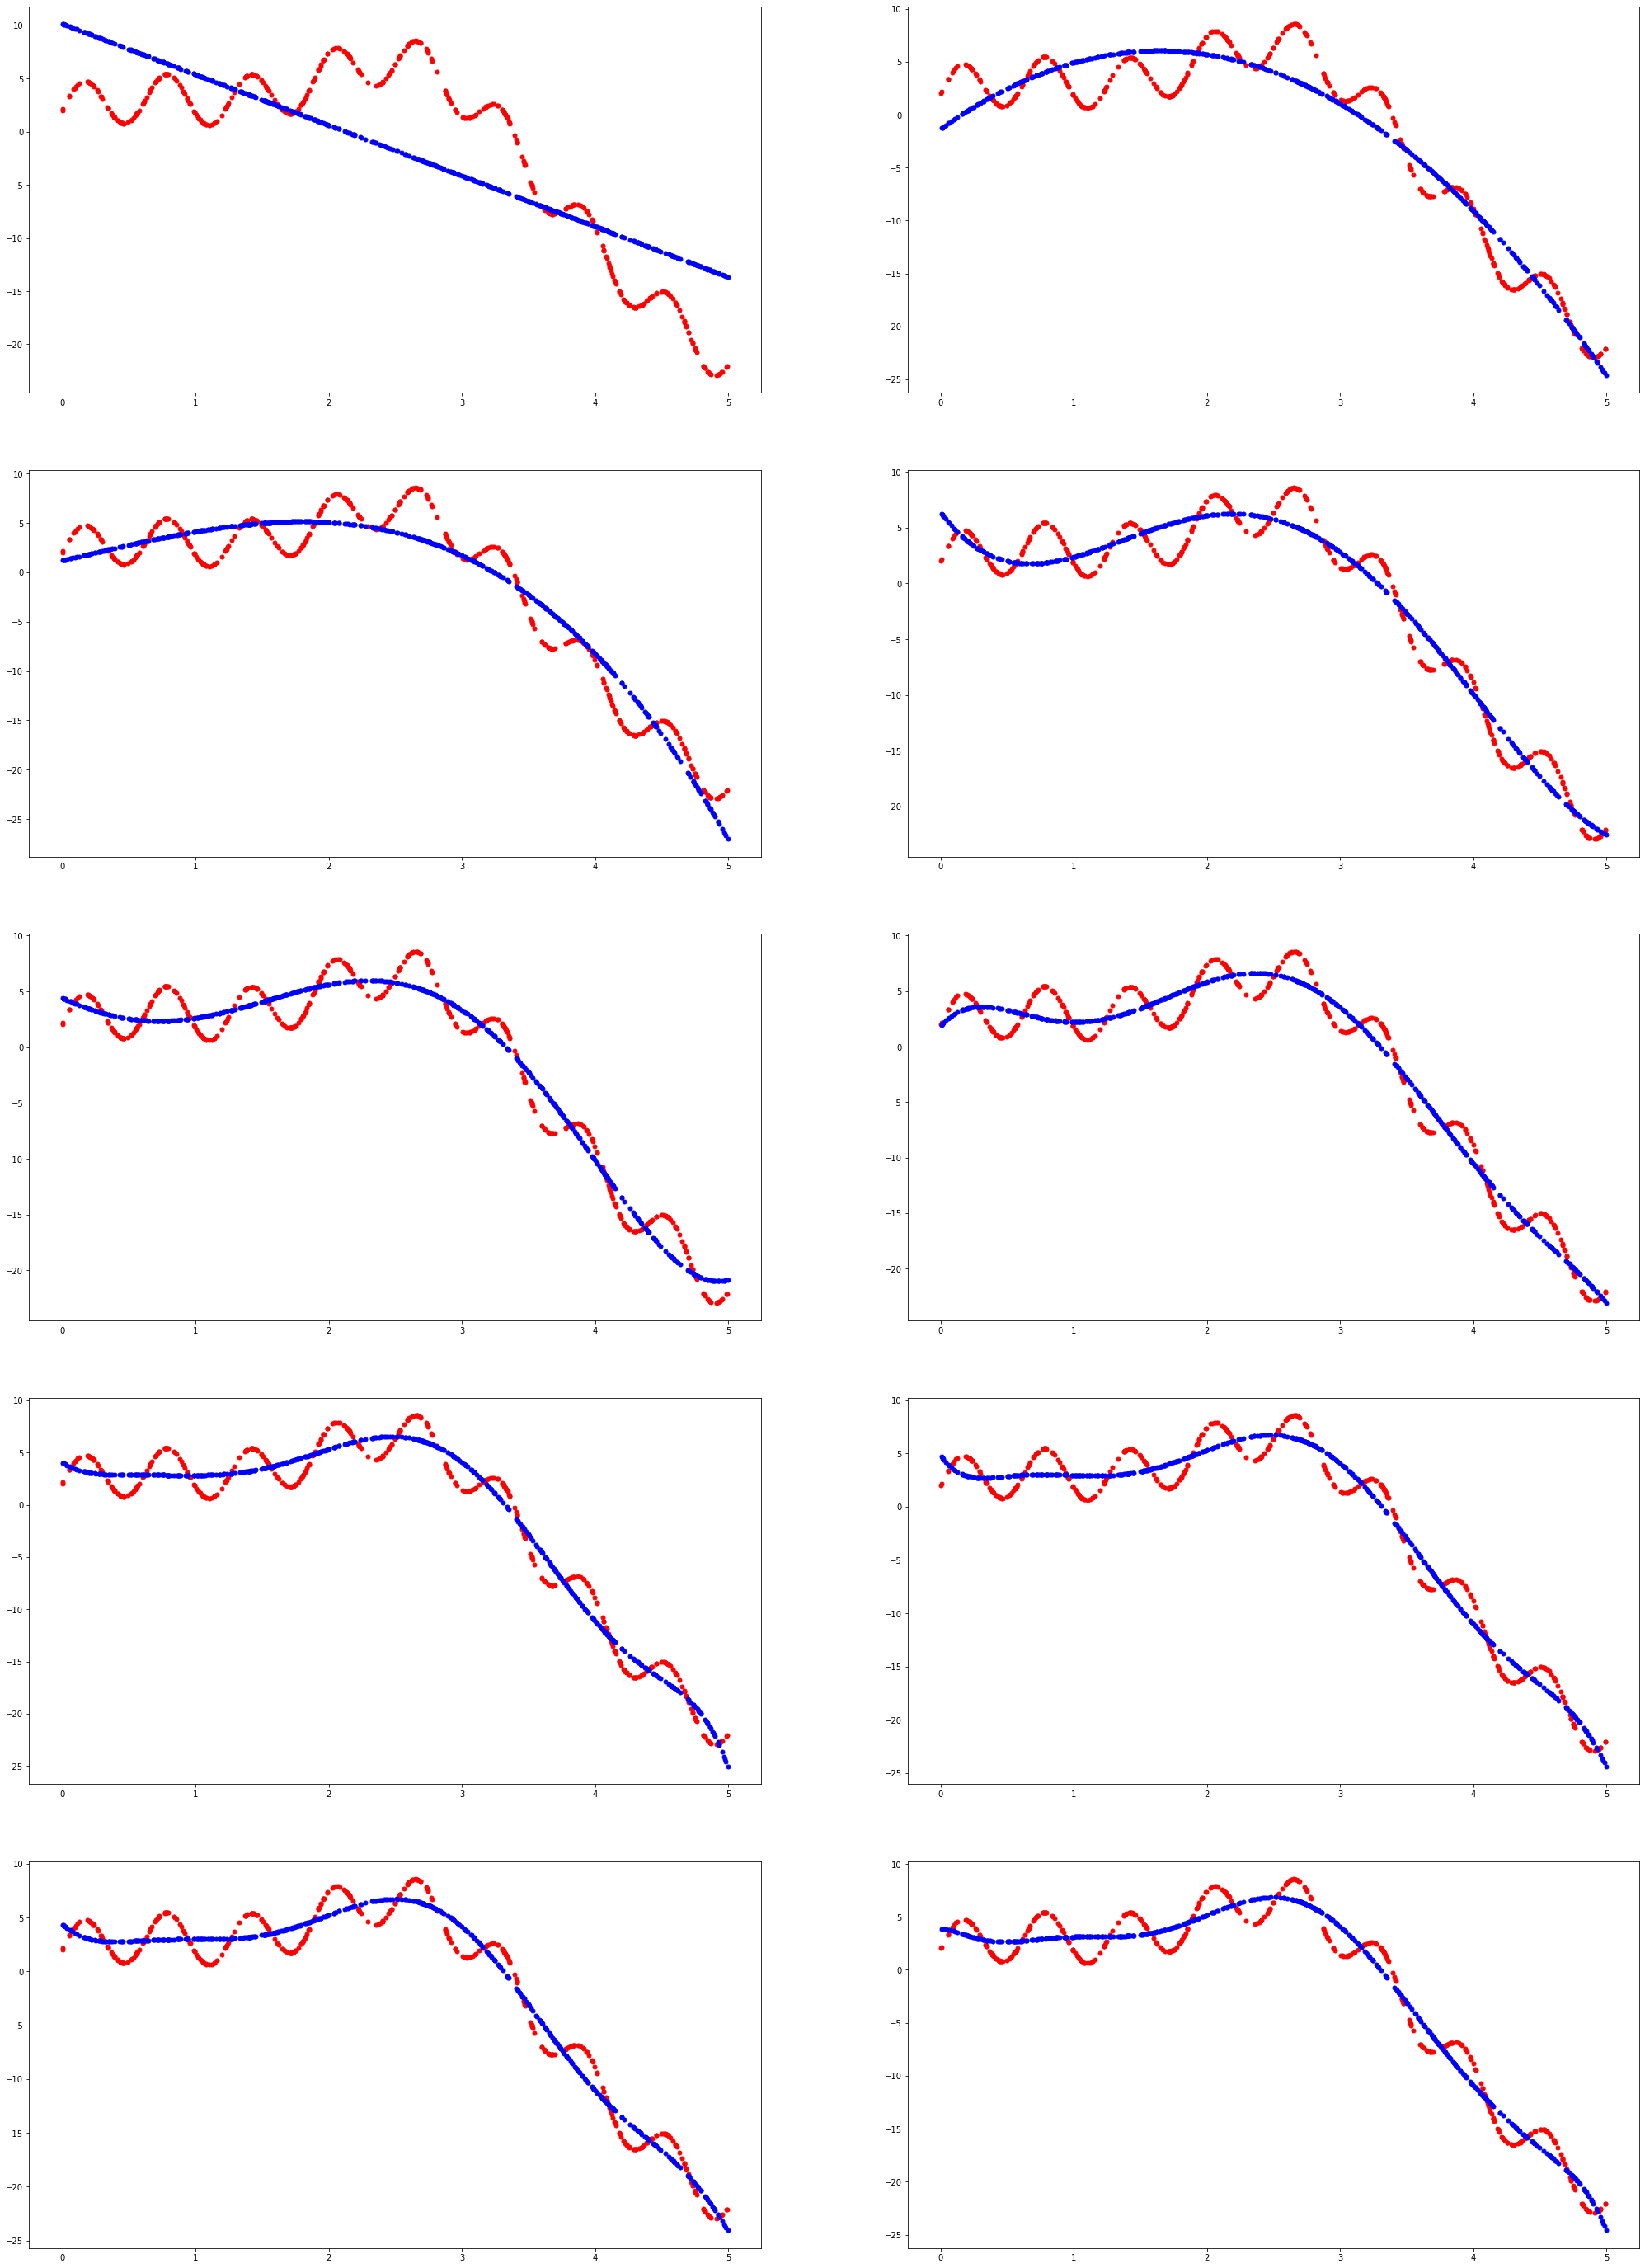

Fold Number 3


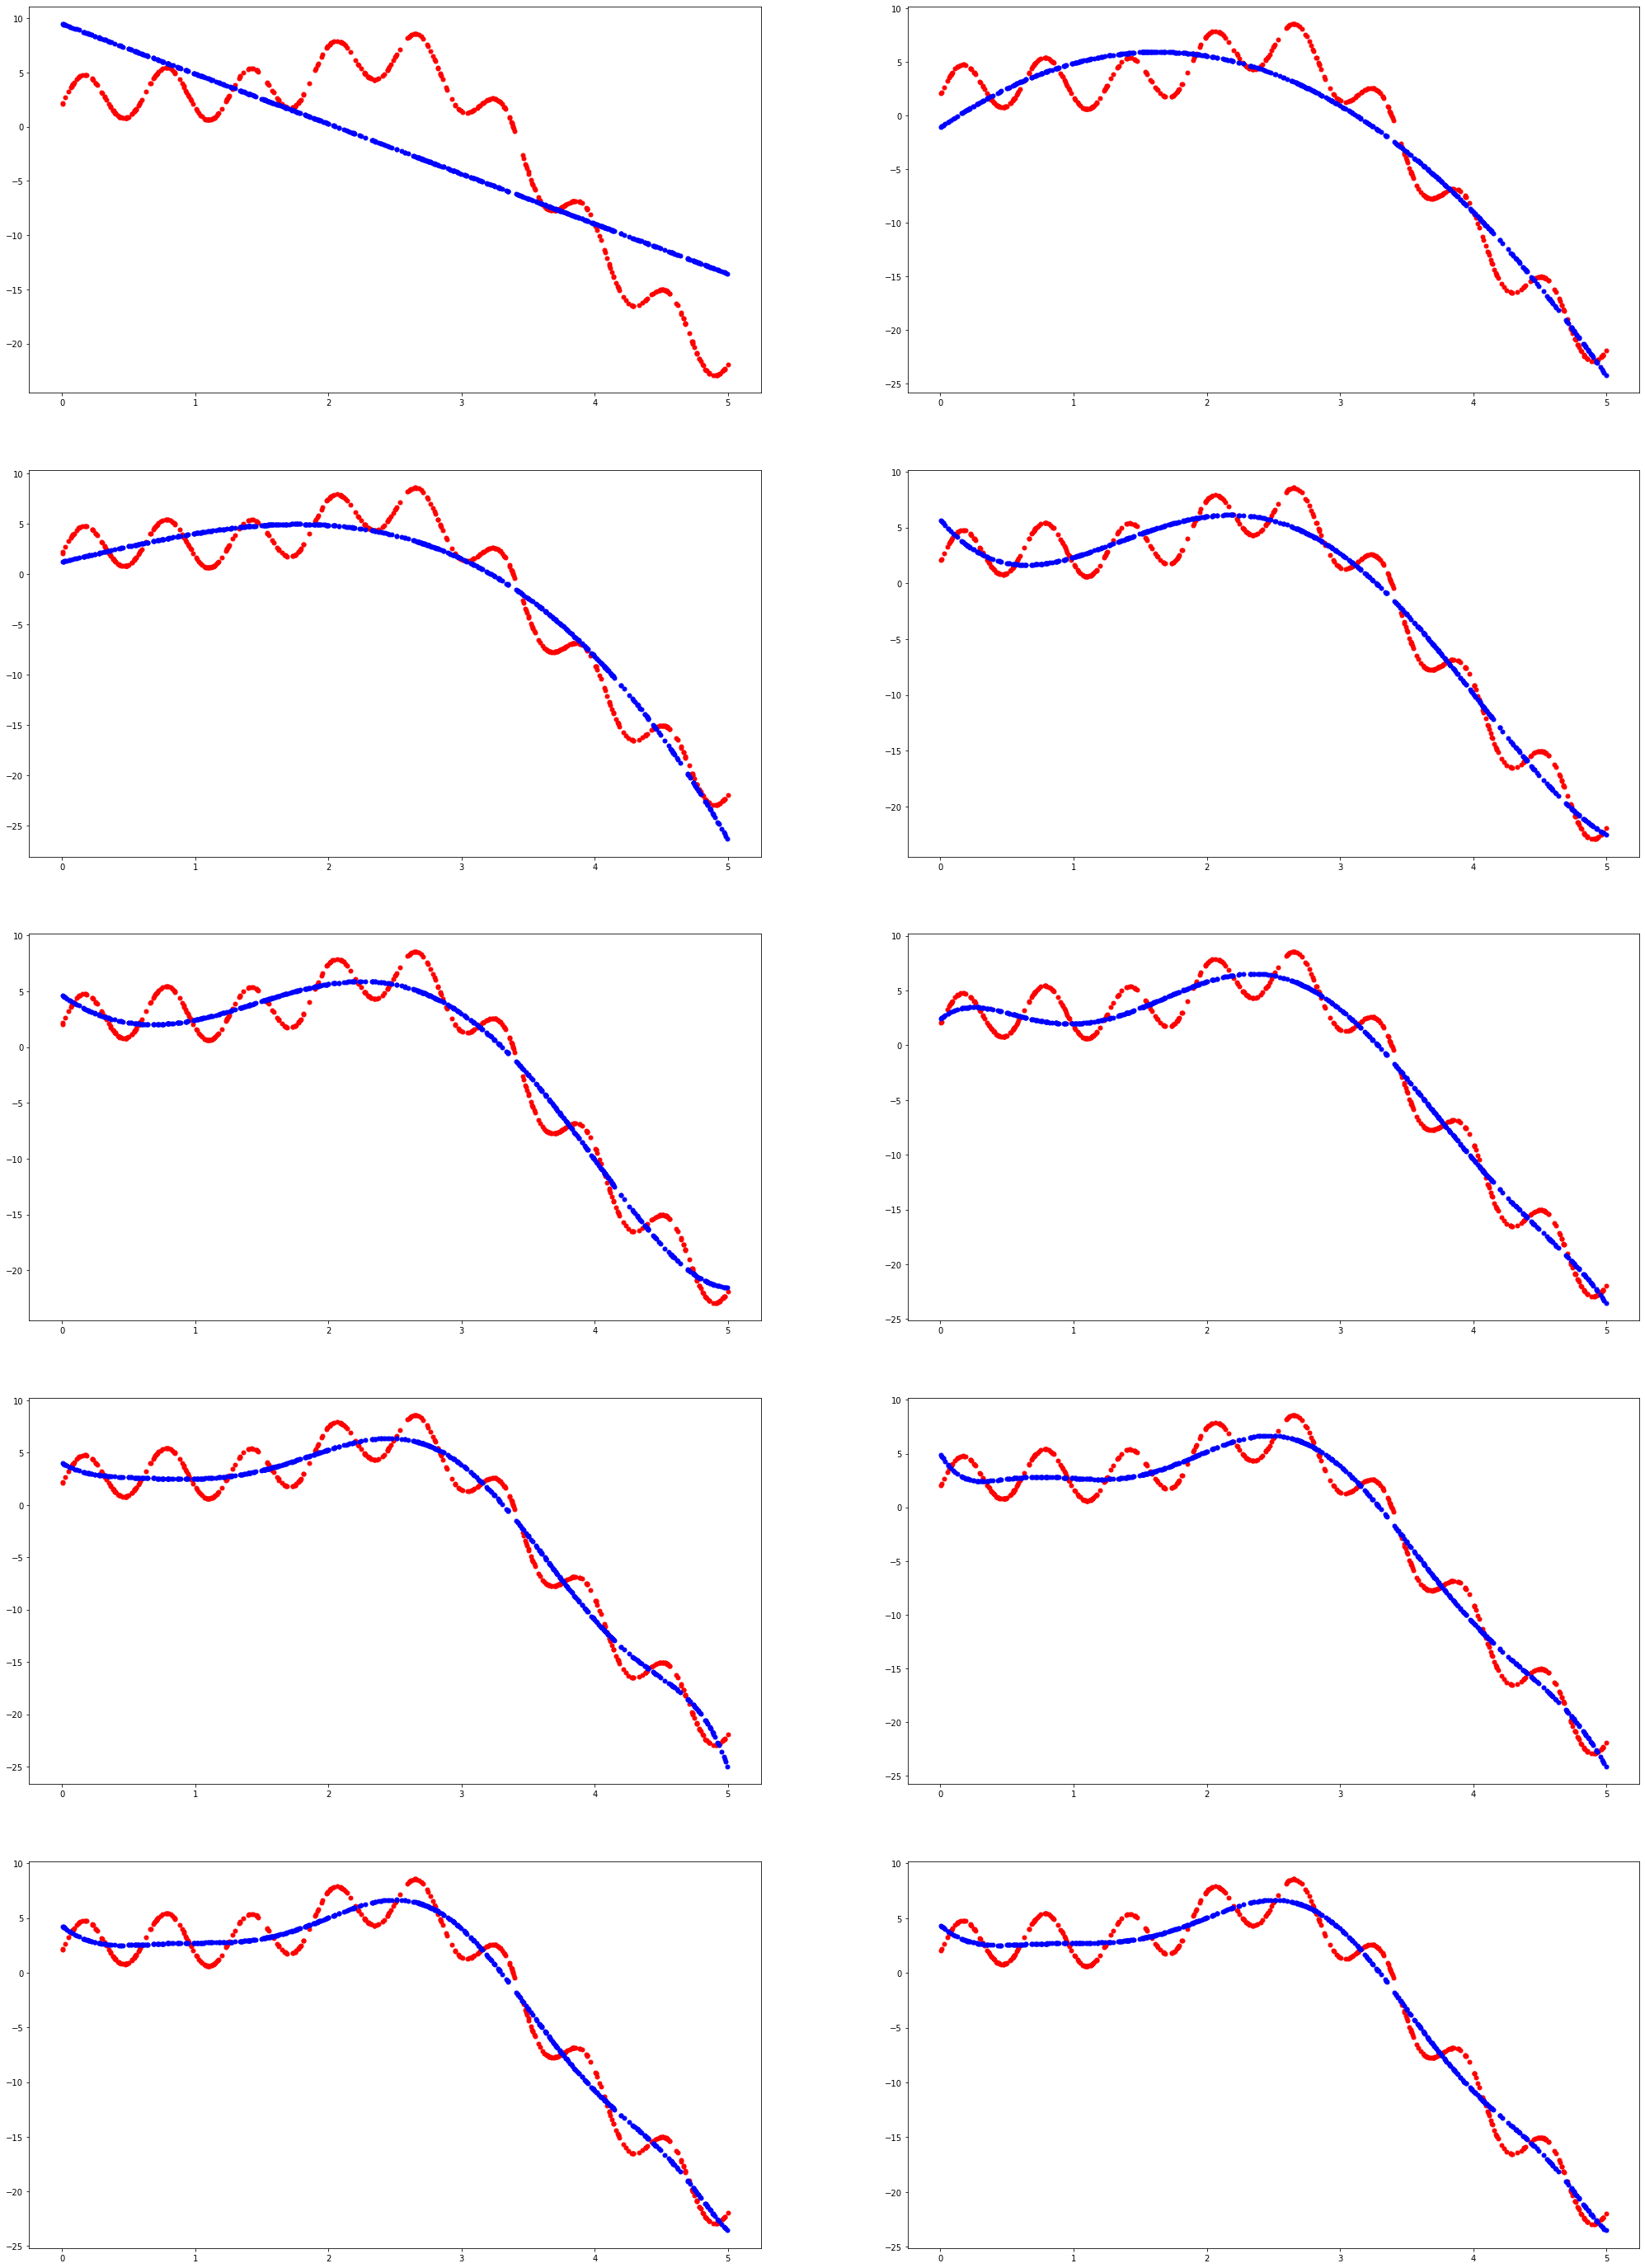

Fold Number 4


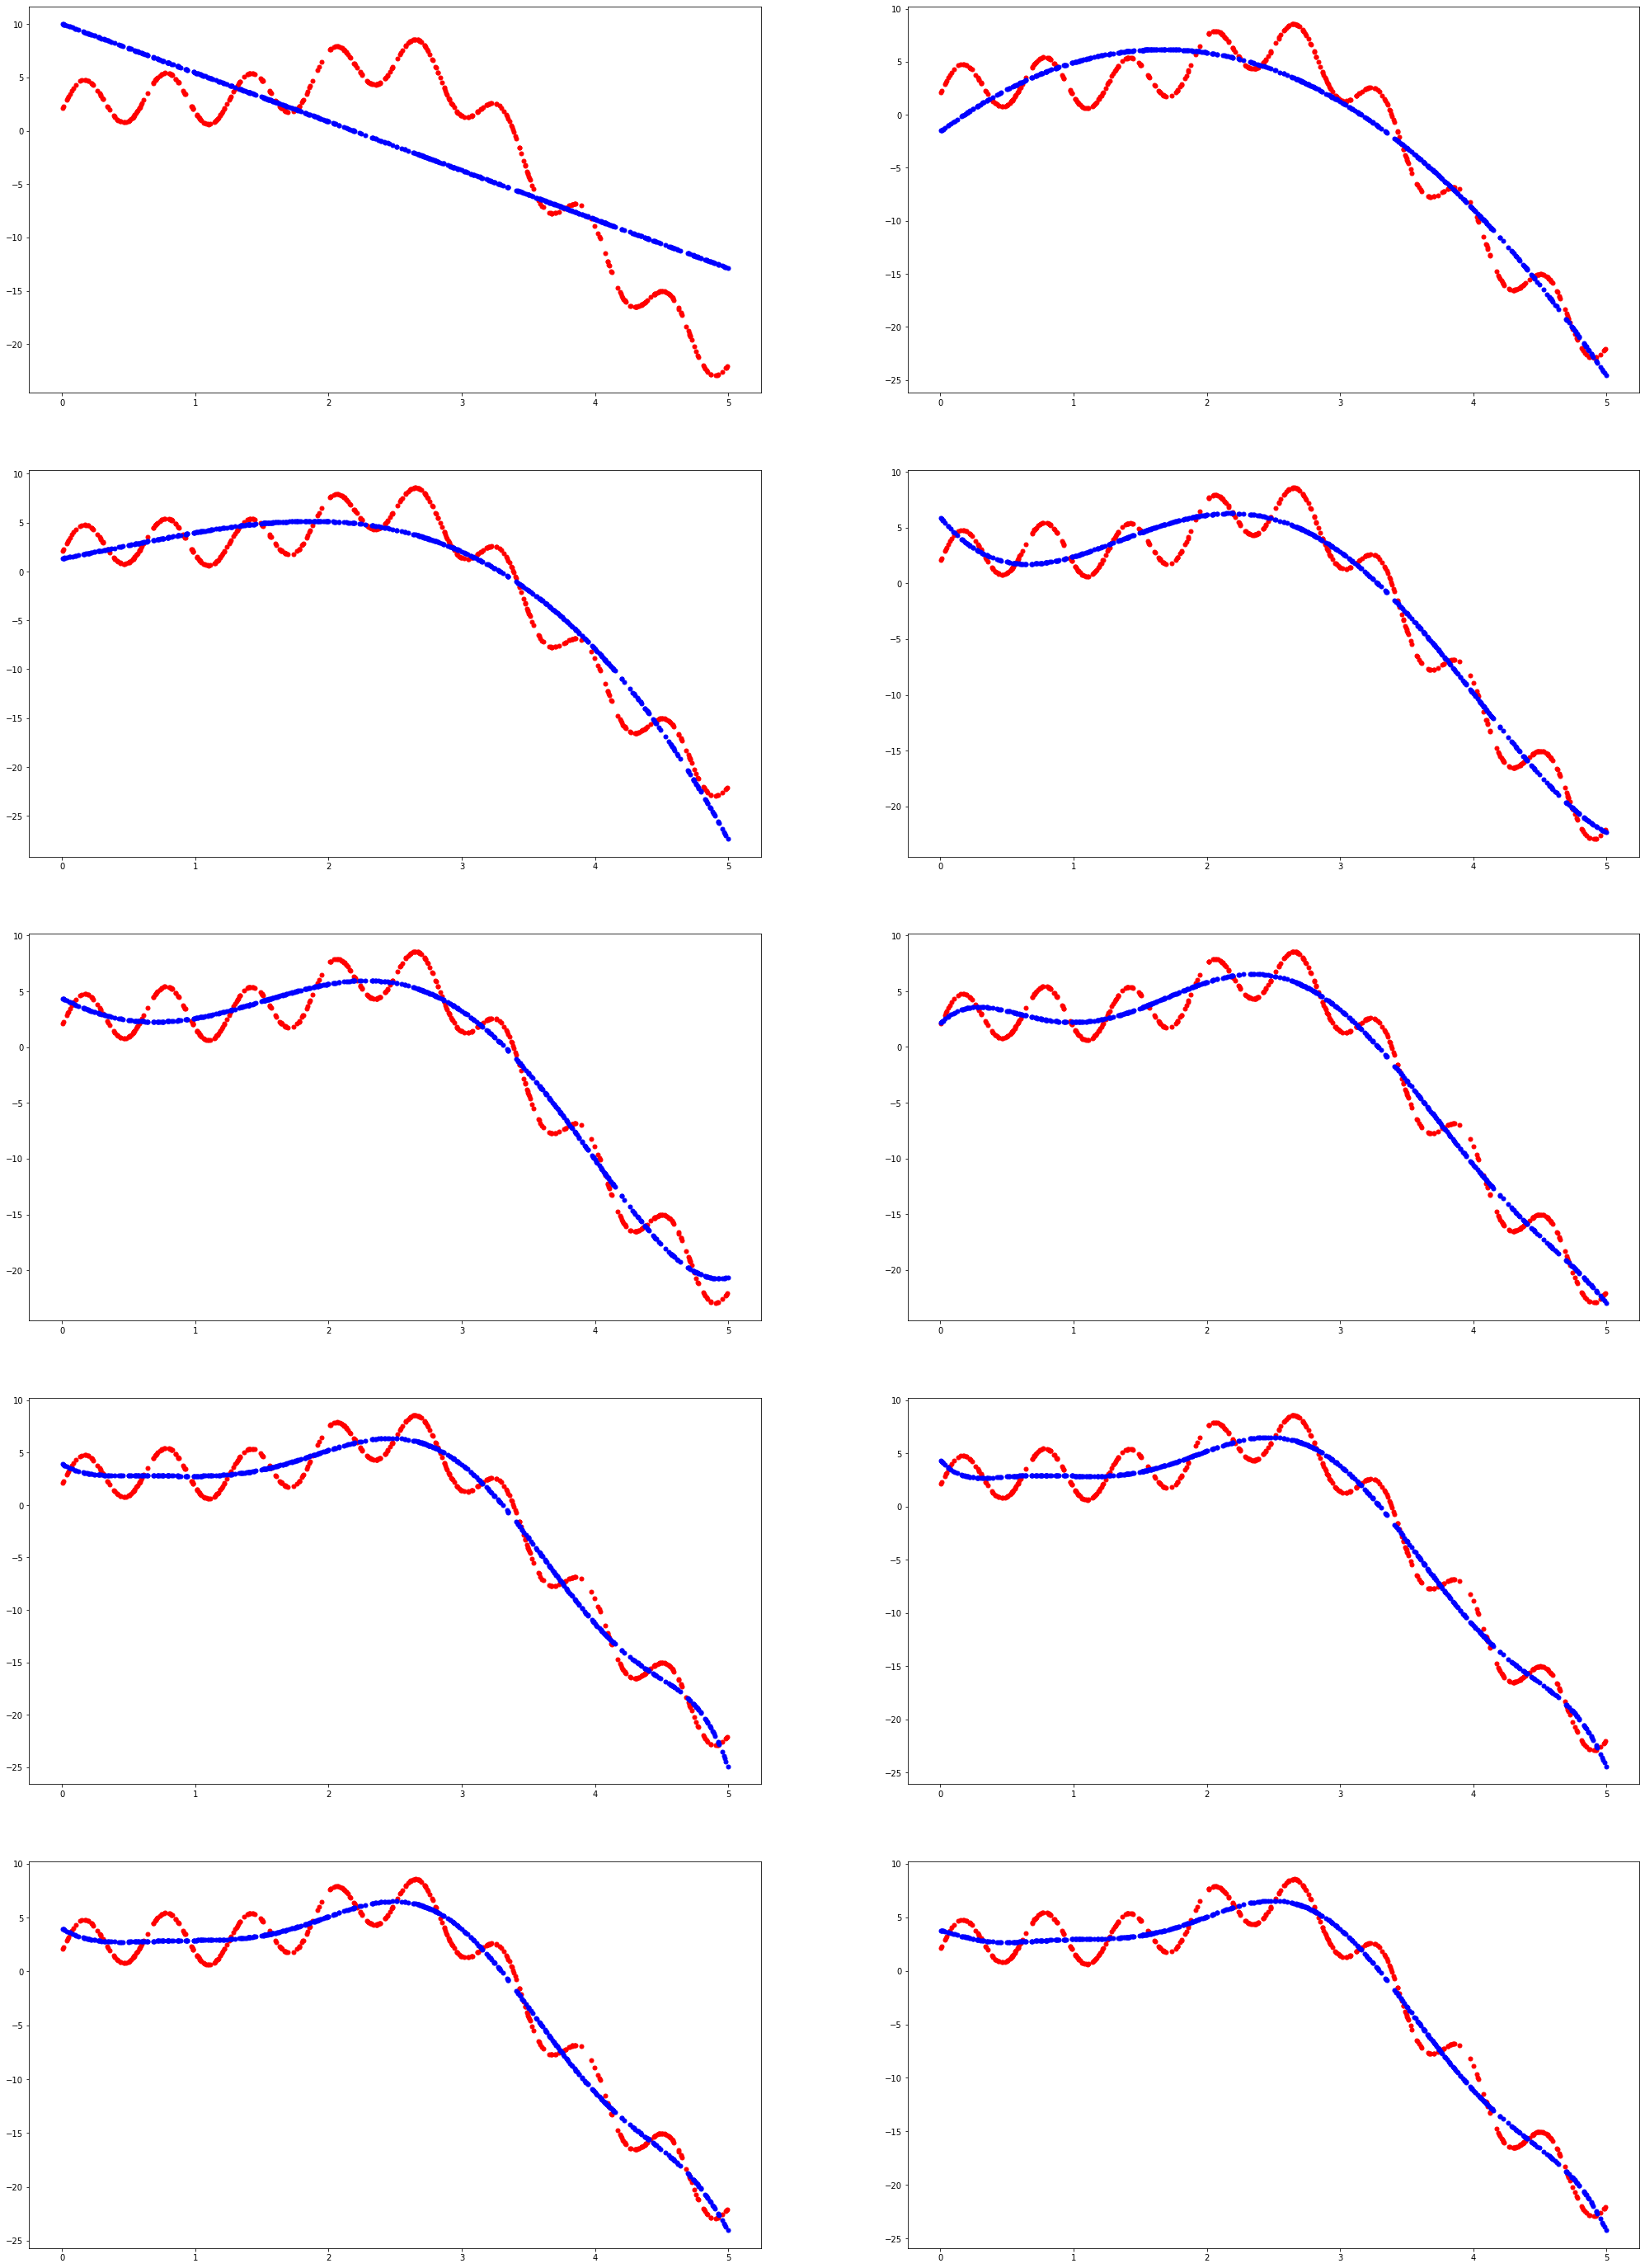

Fold Number 5


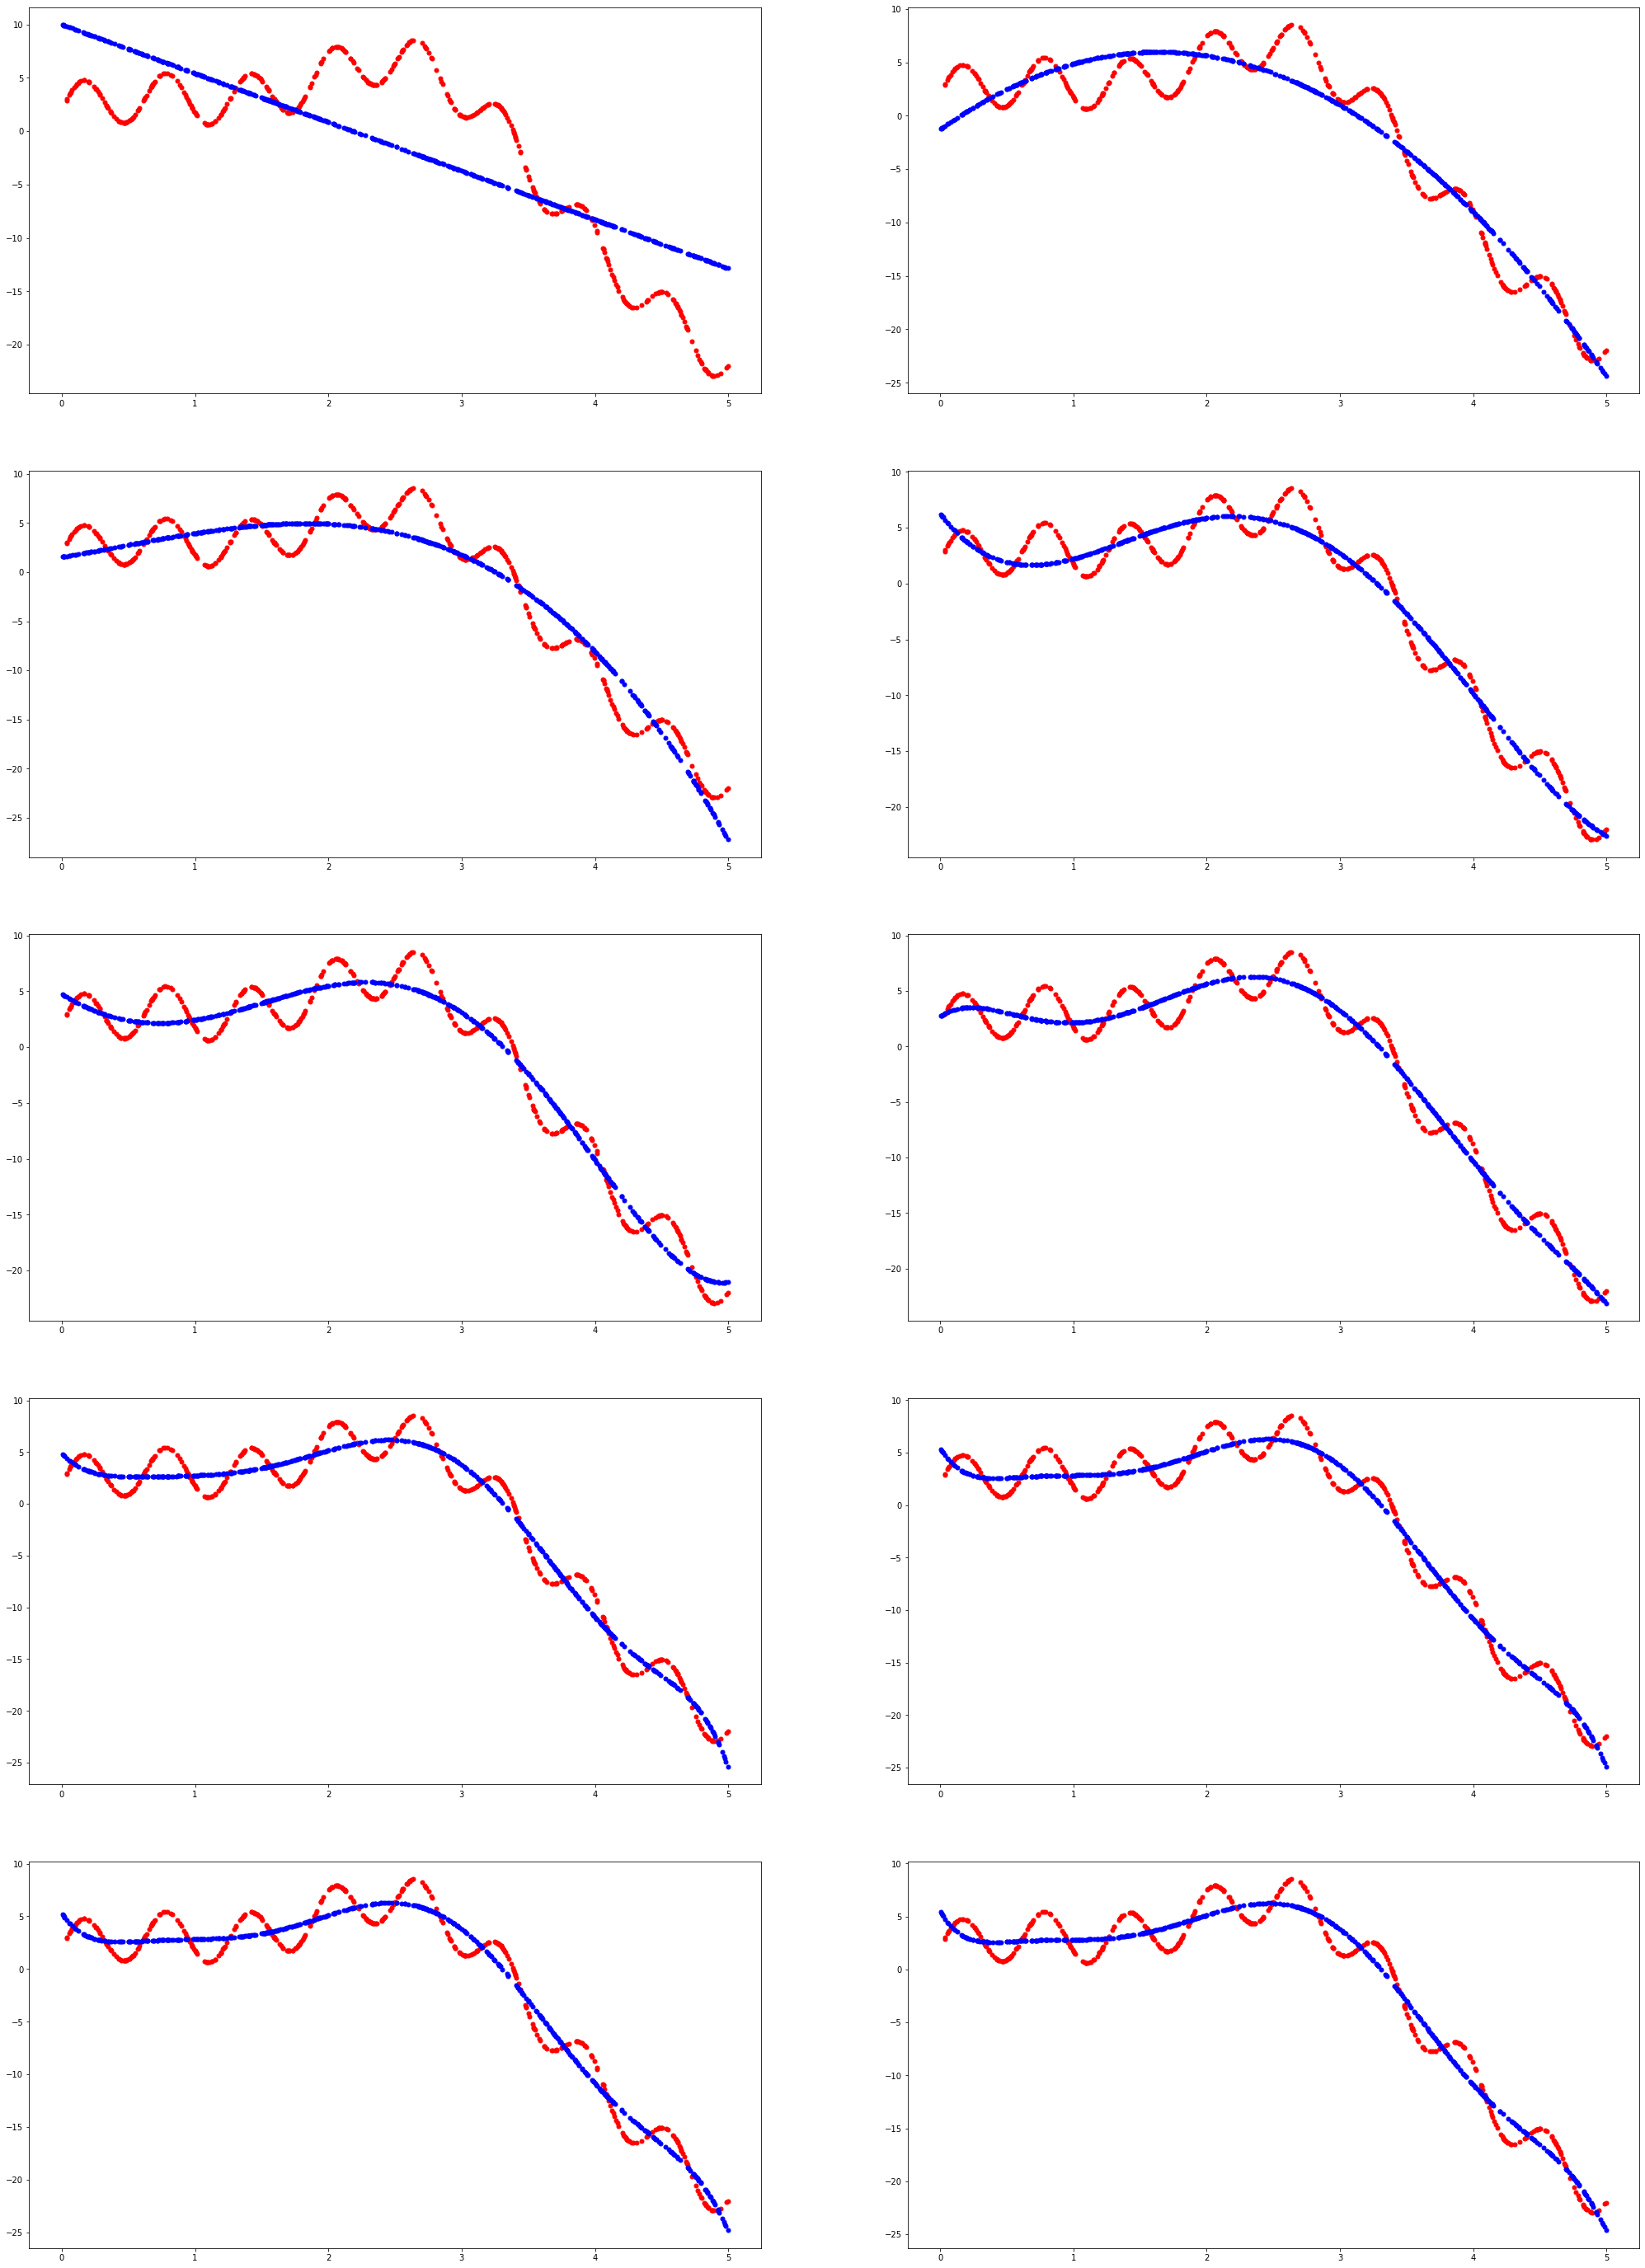

Fold Number 6


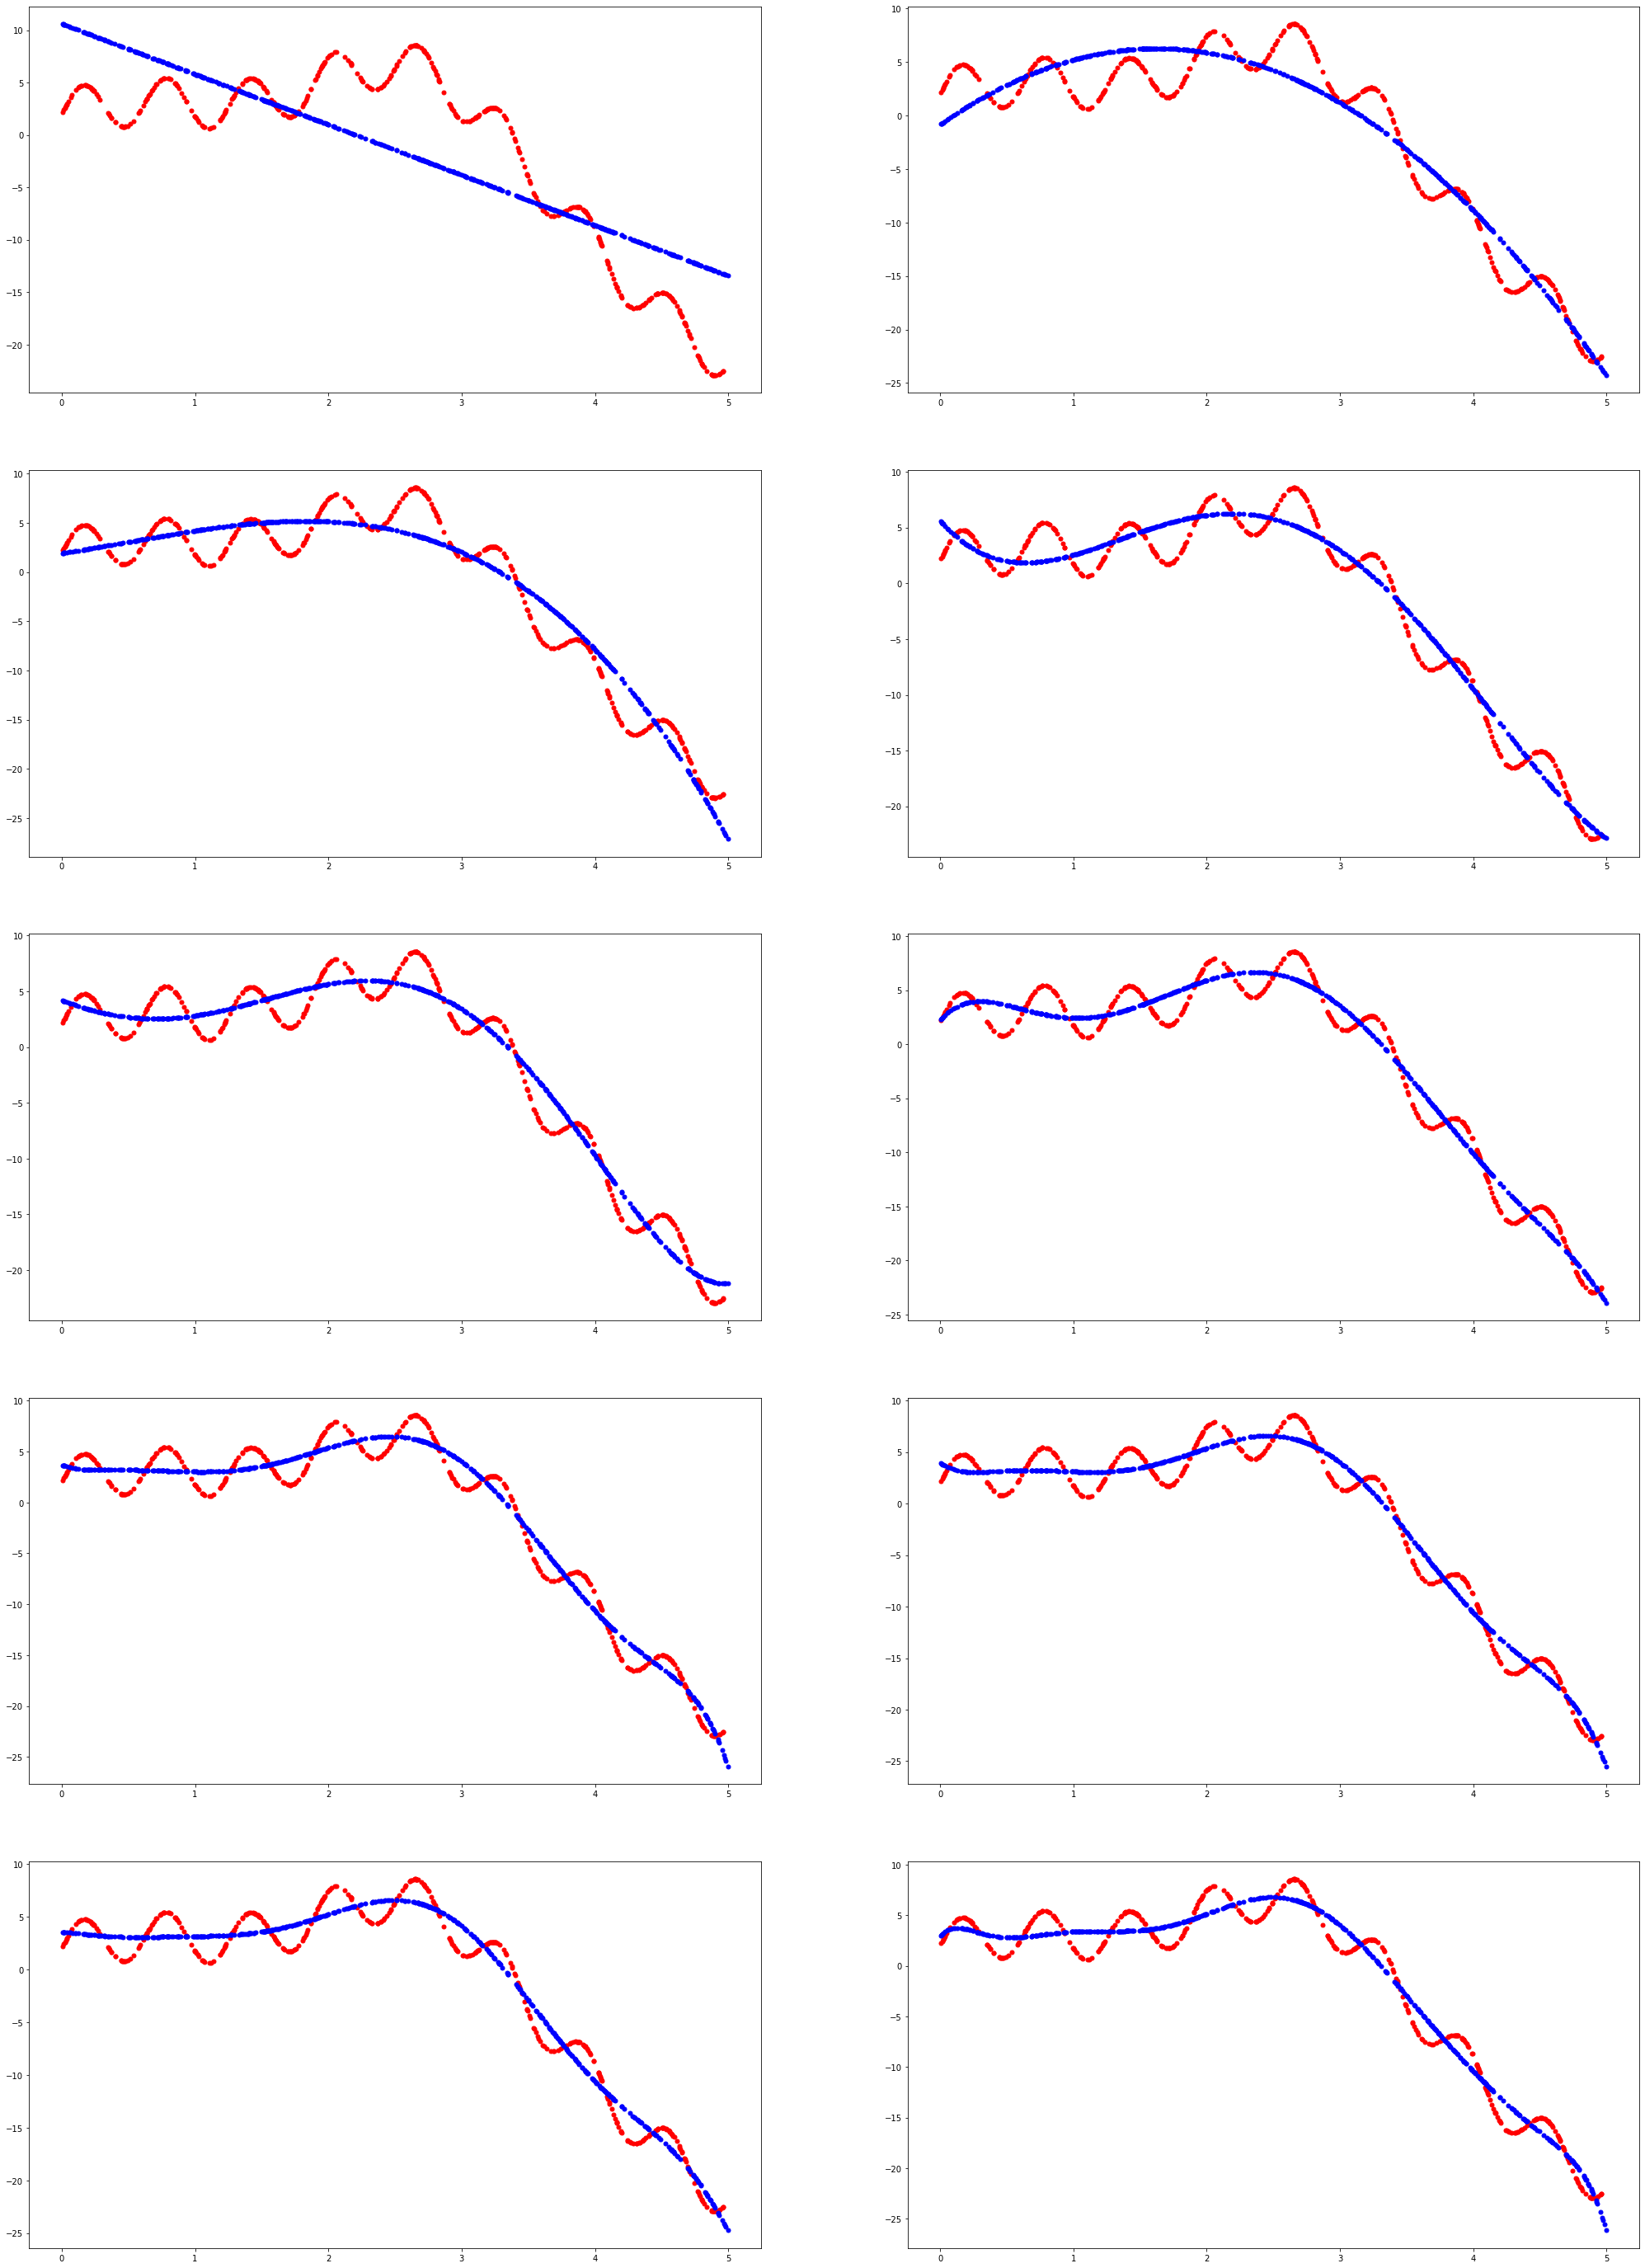

Fold Number 7


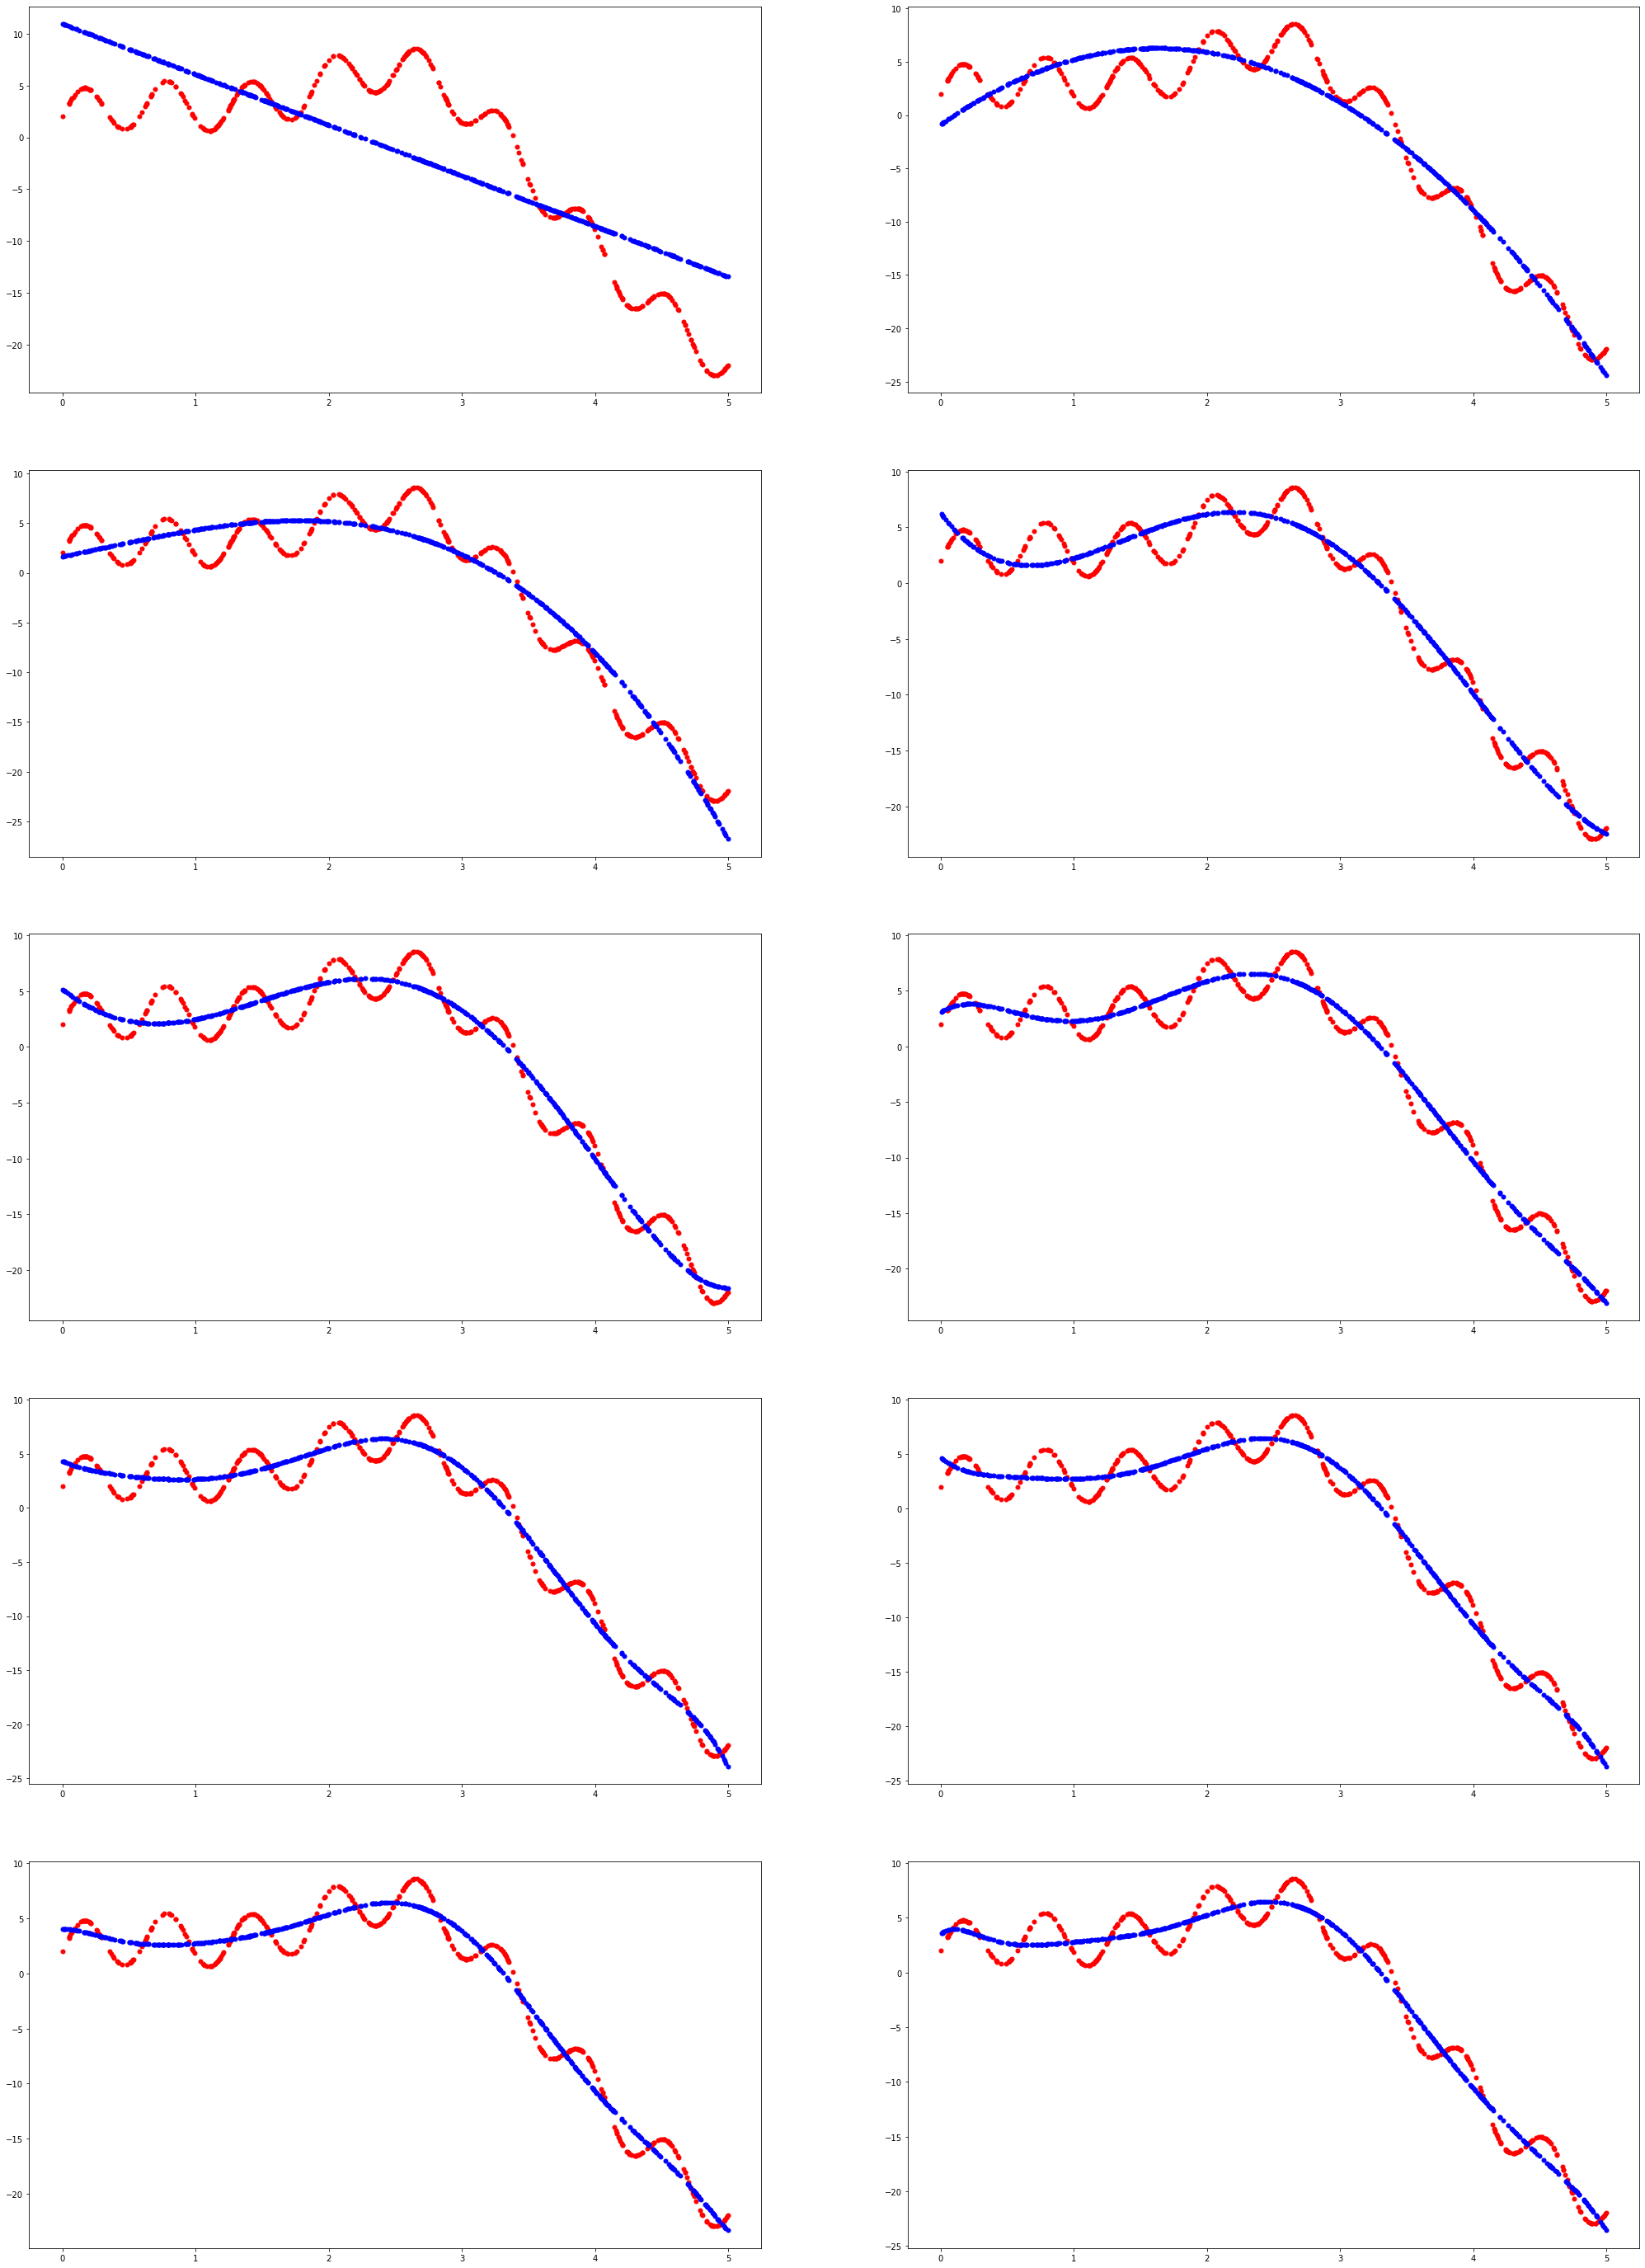

Fold Number 8


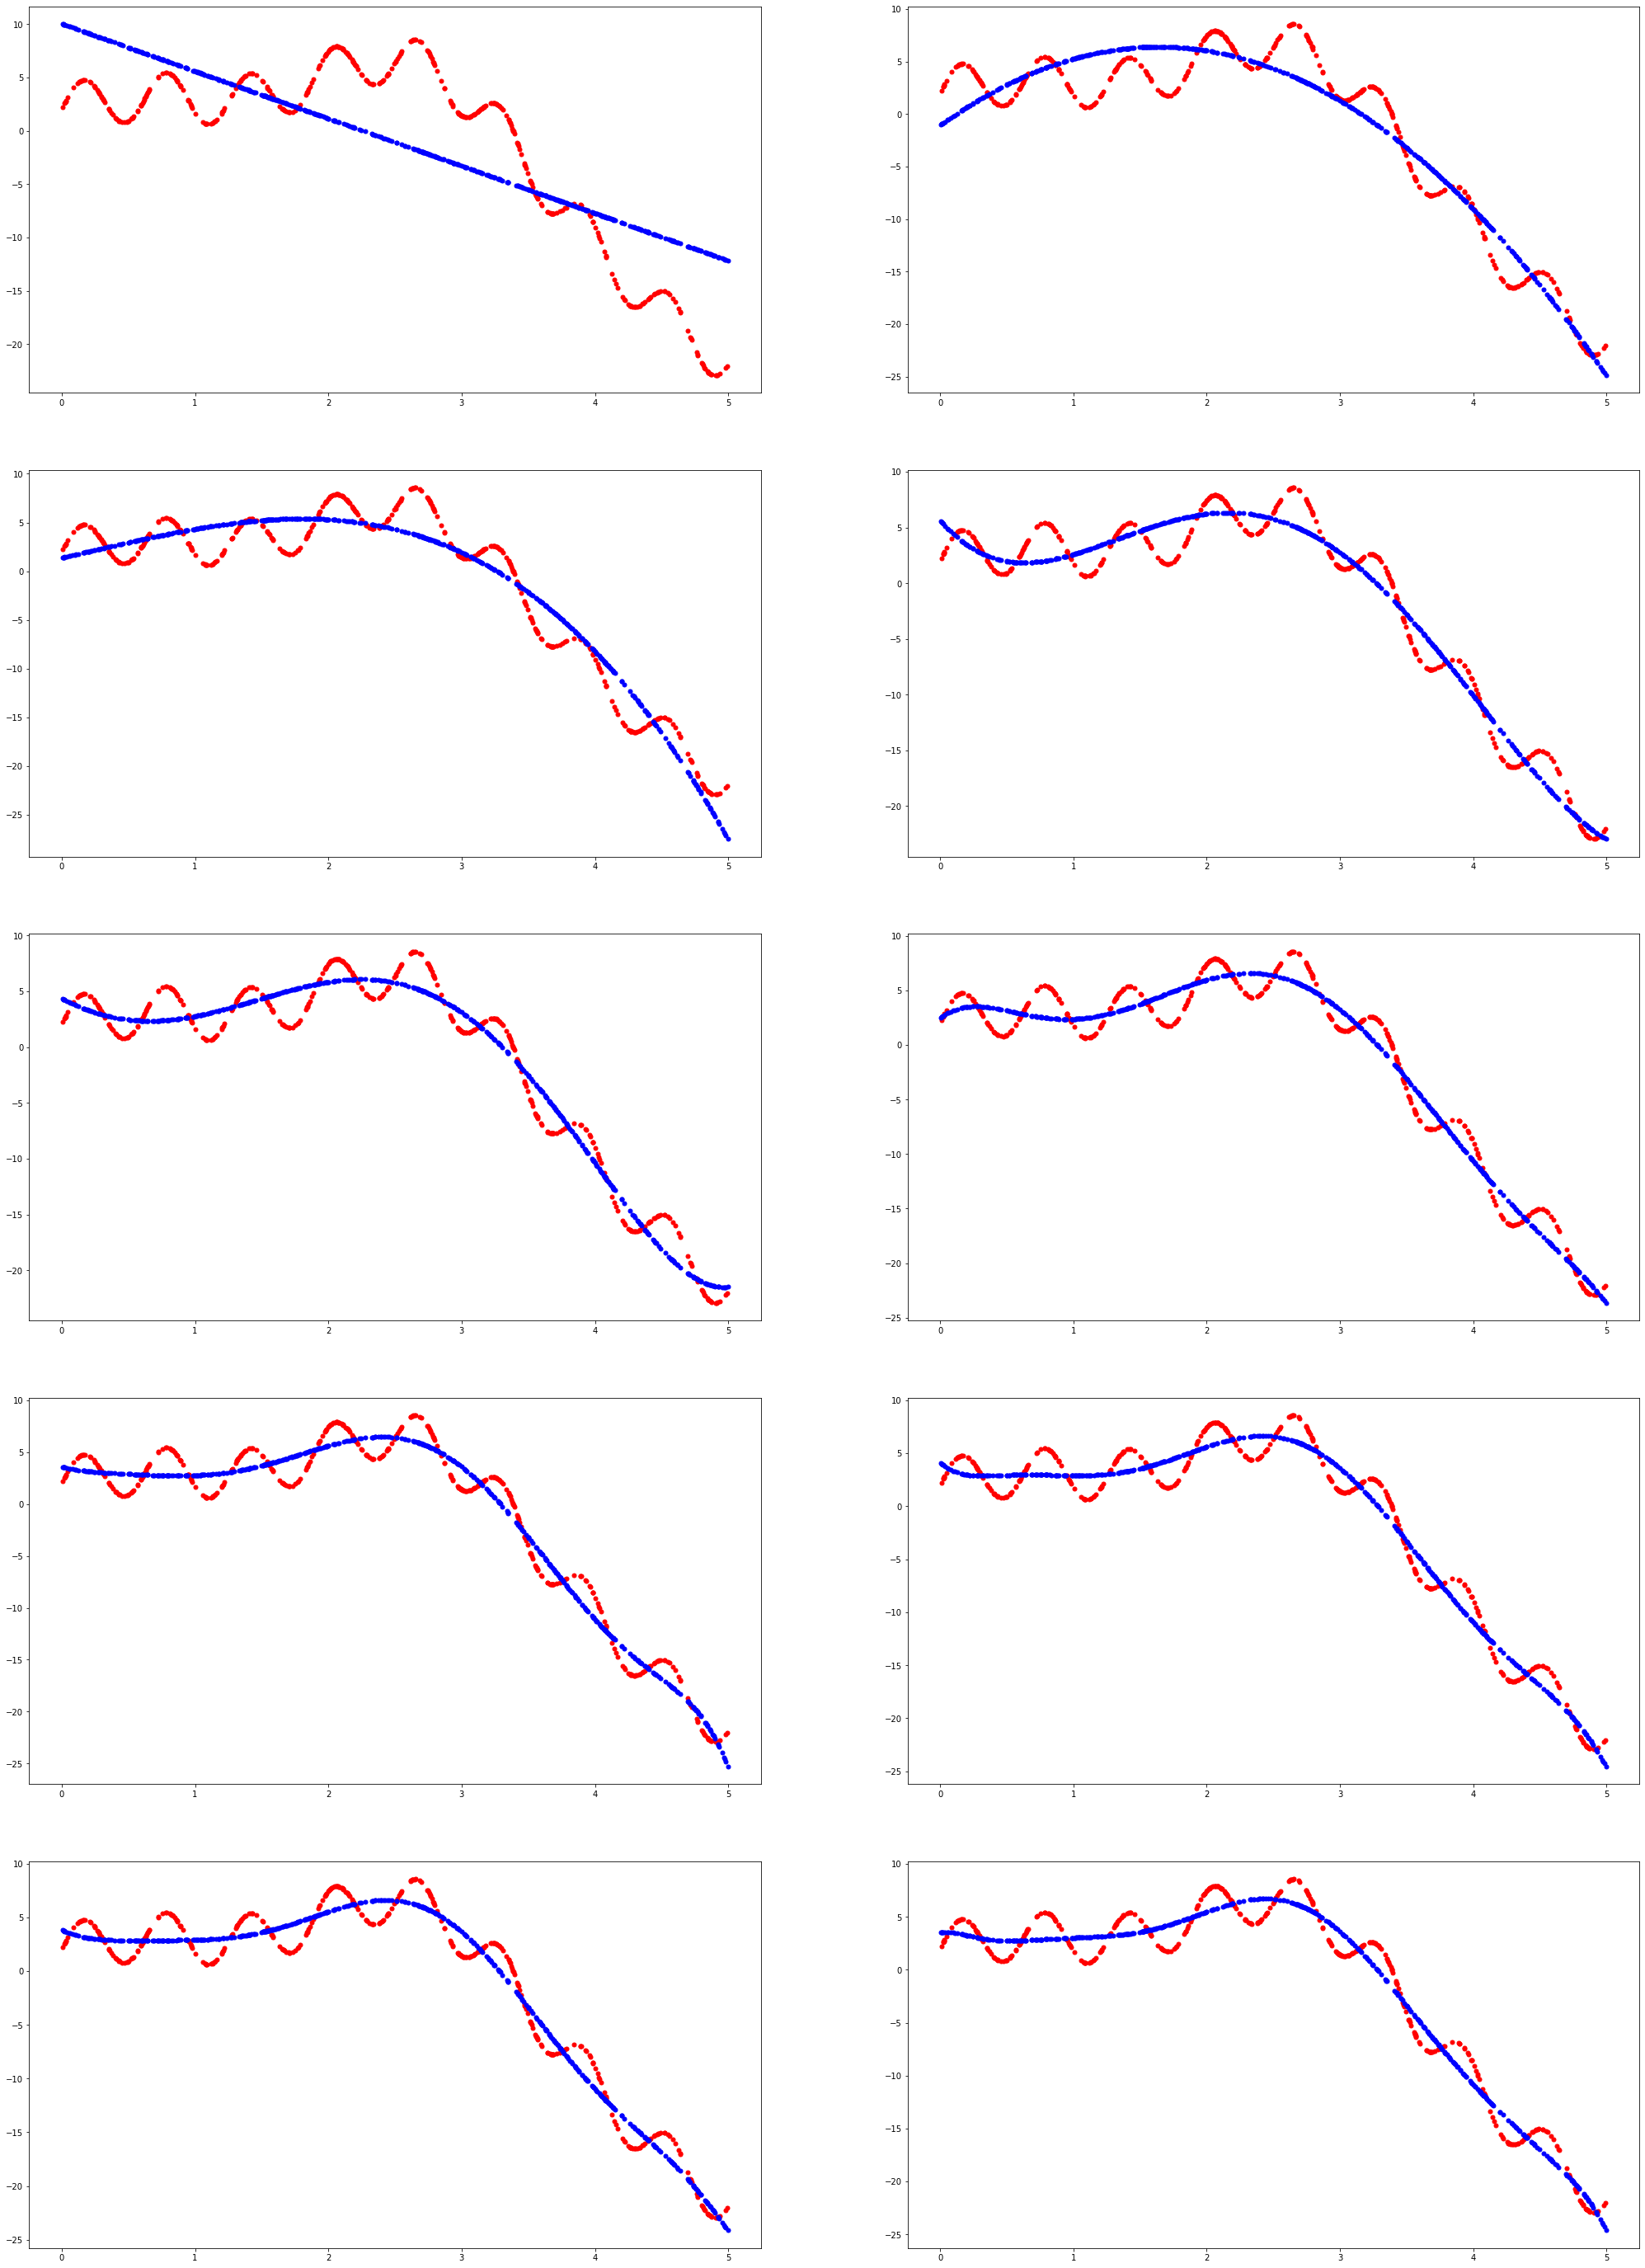

Fold Number 9


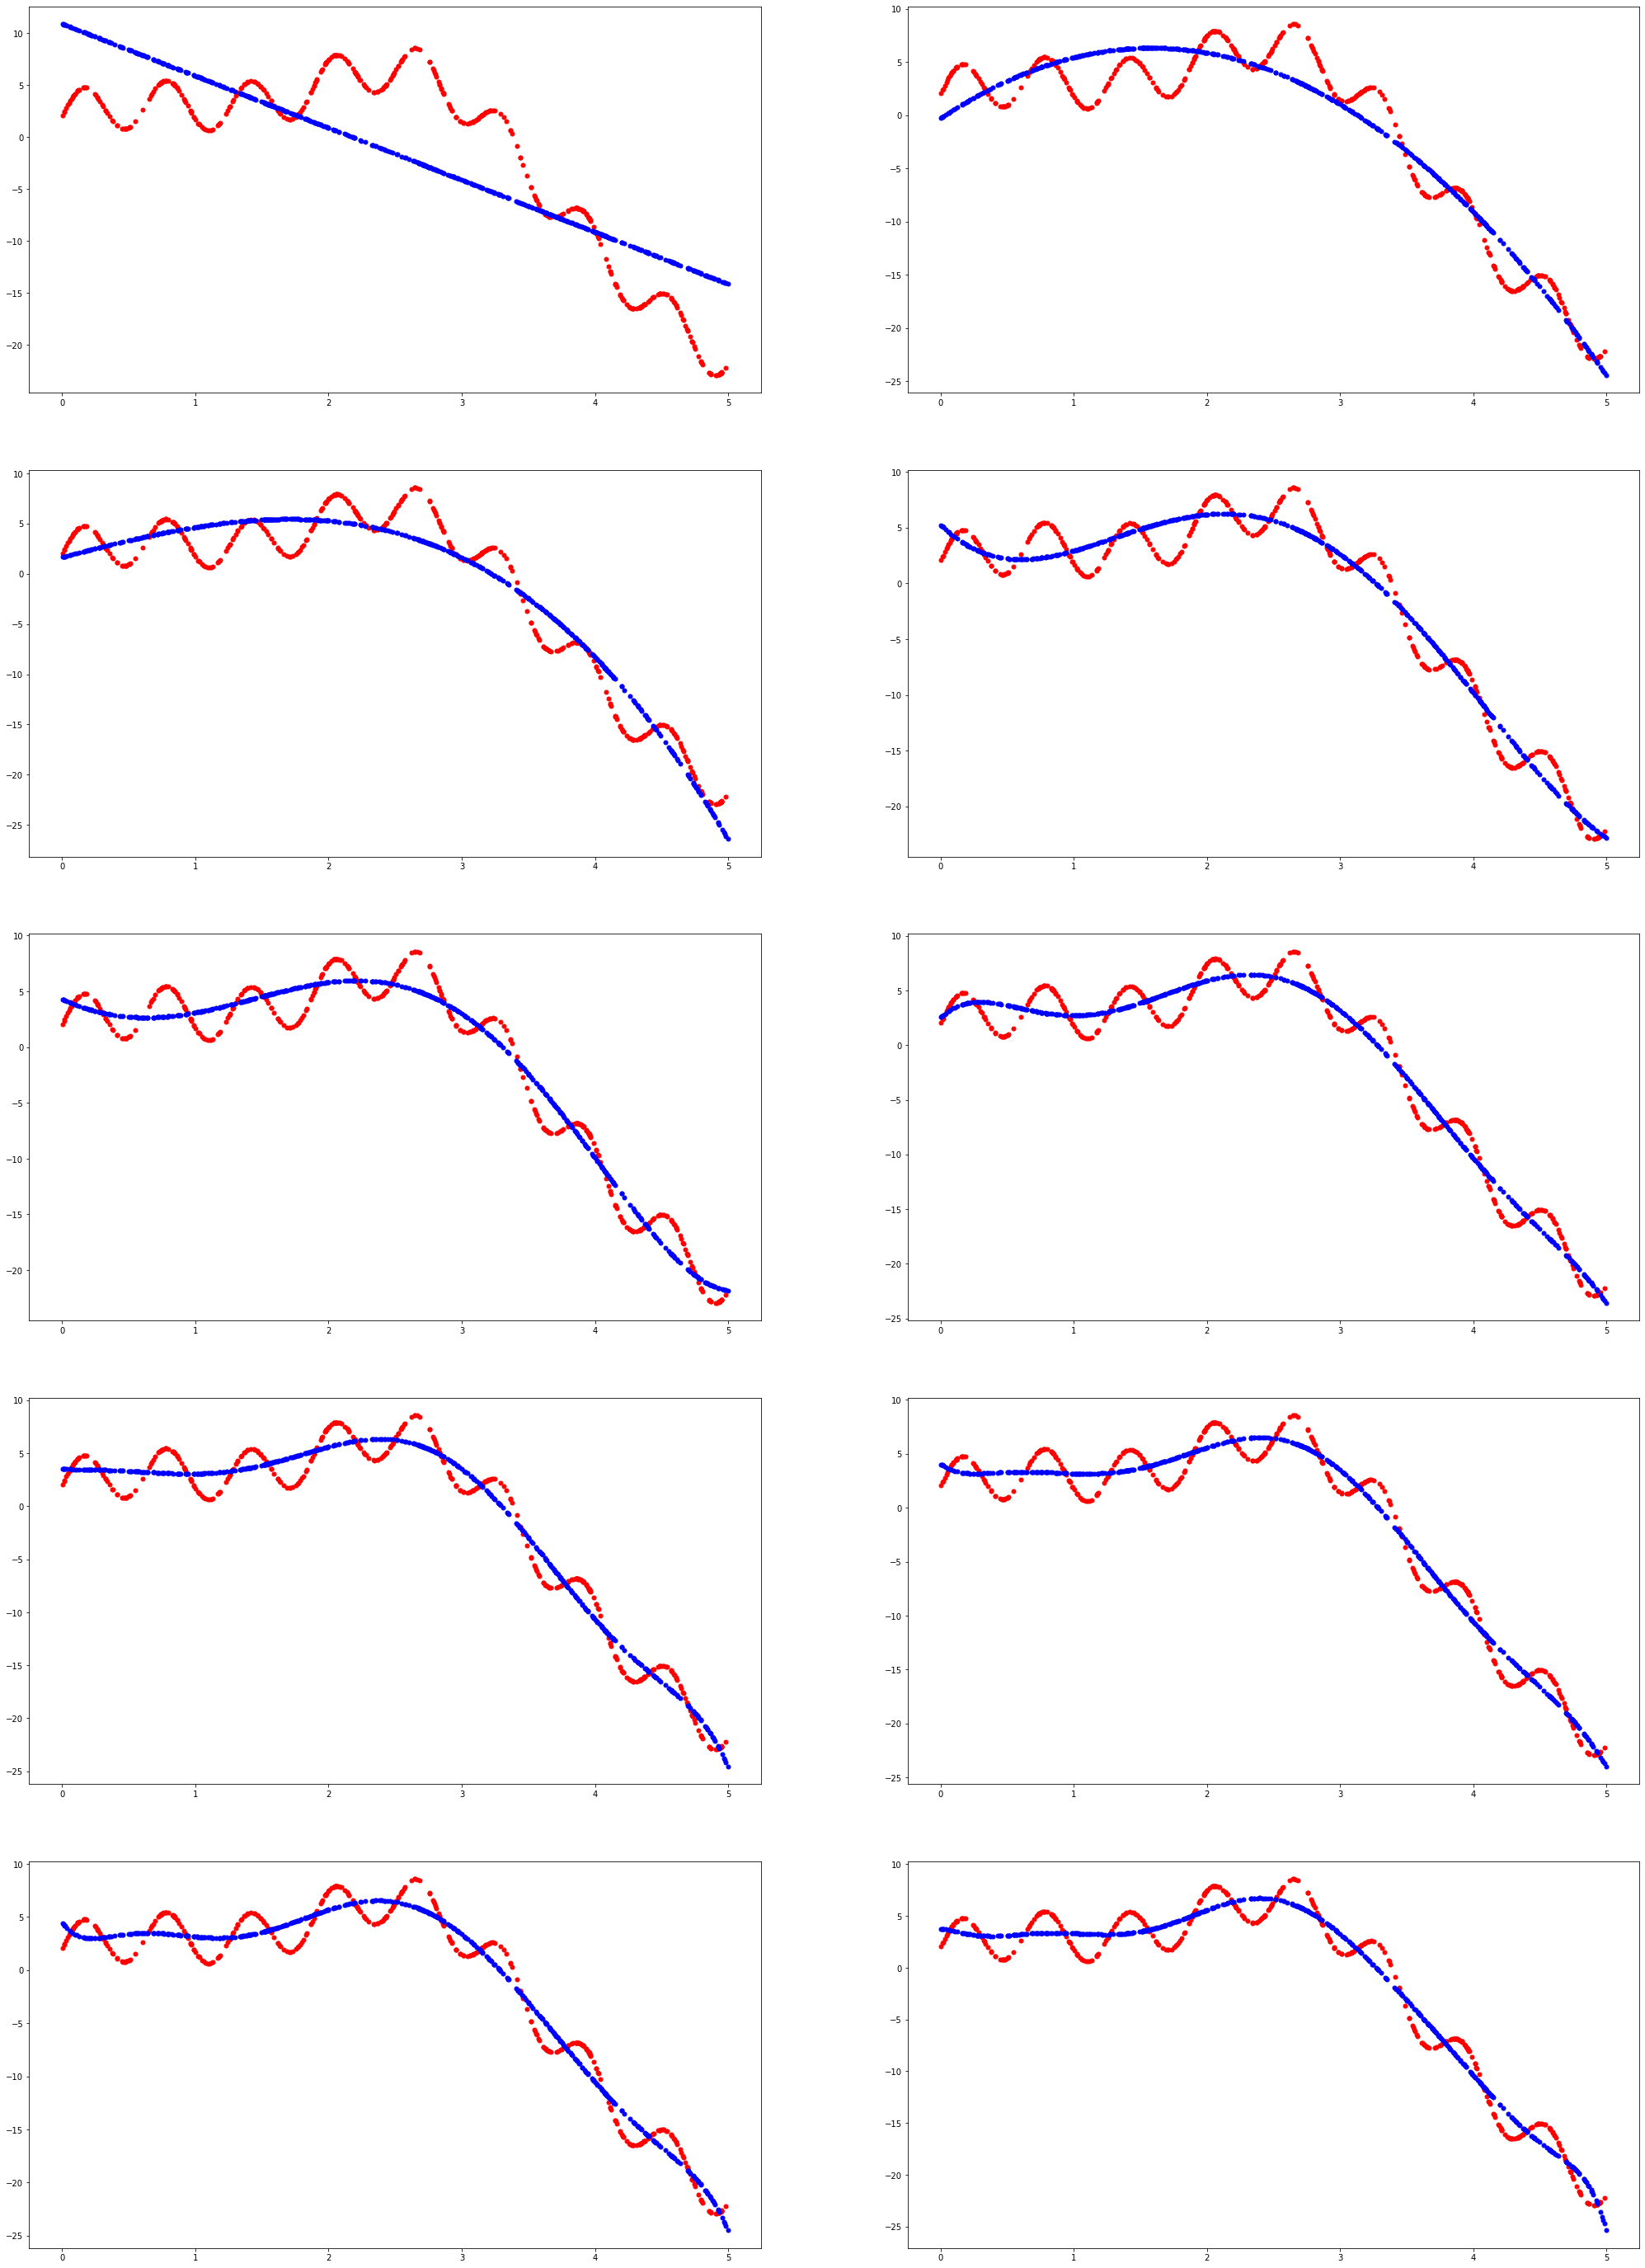

Fold Number 10


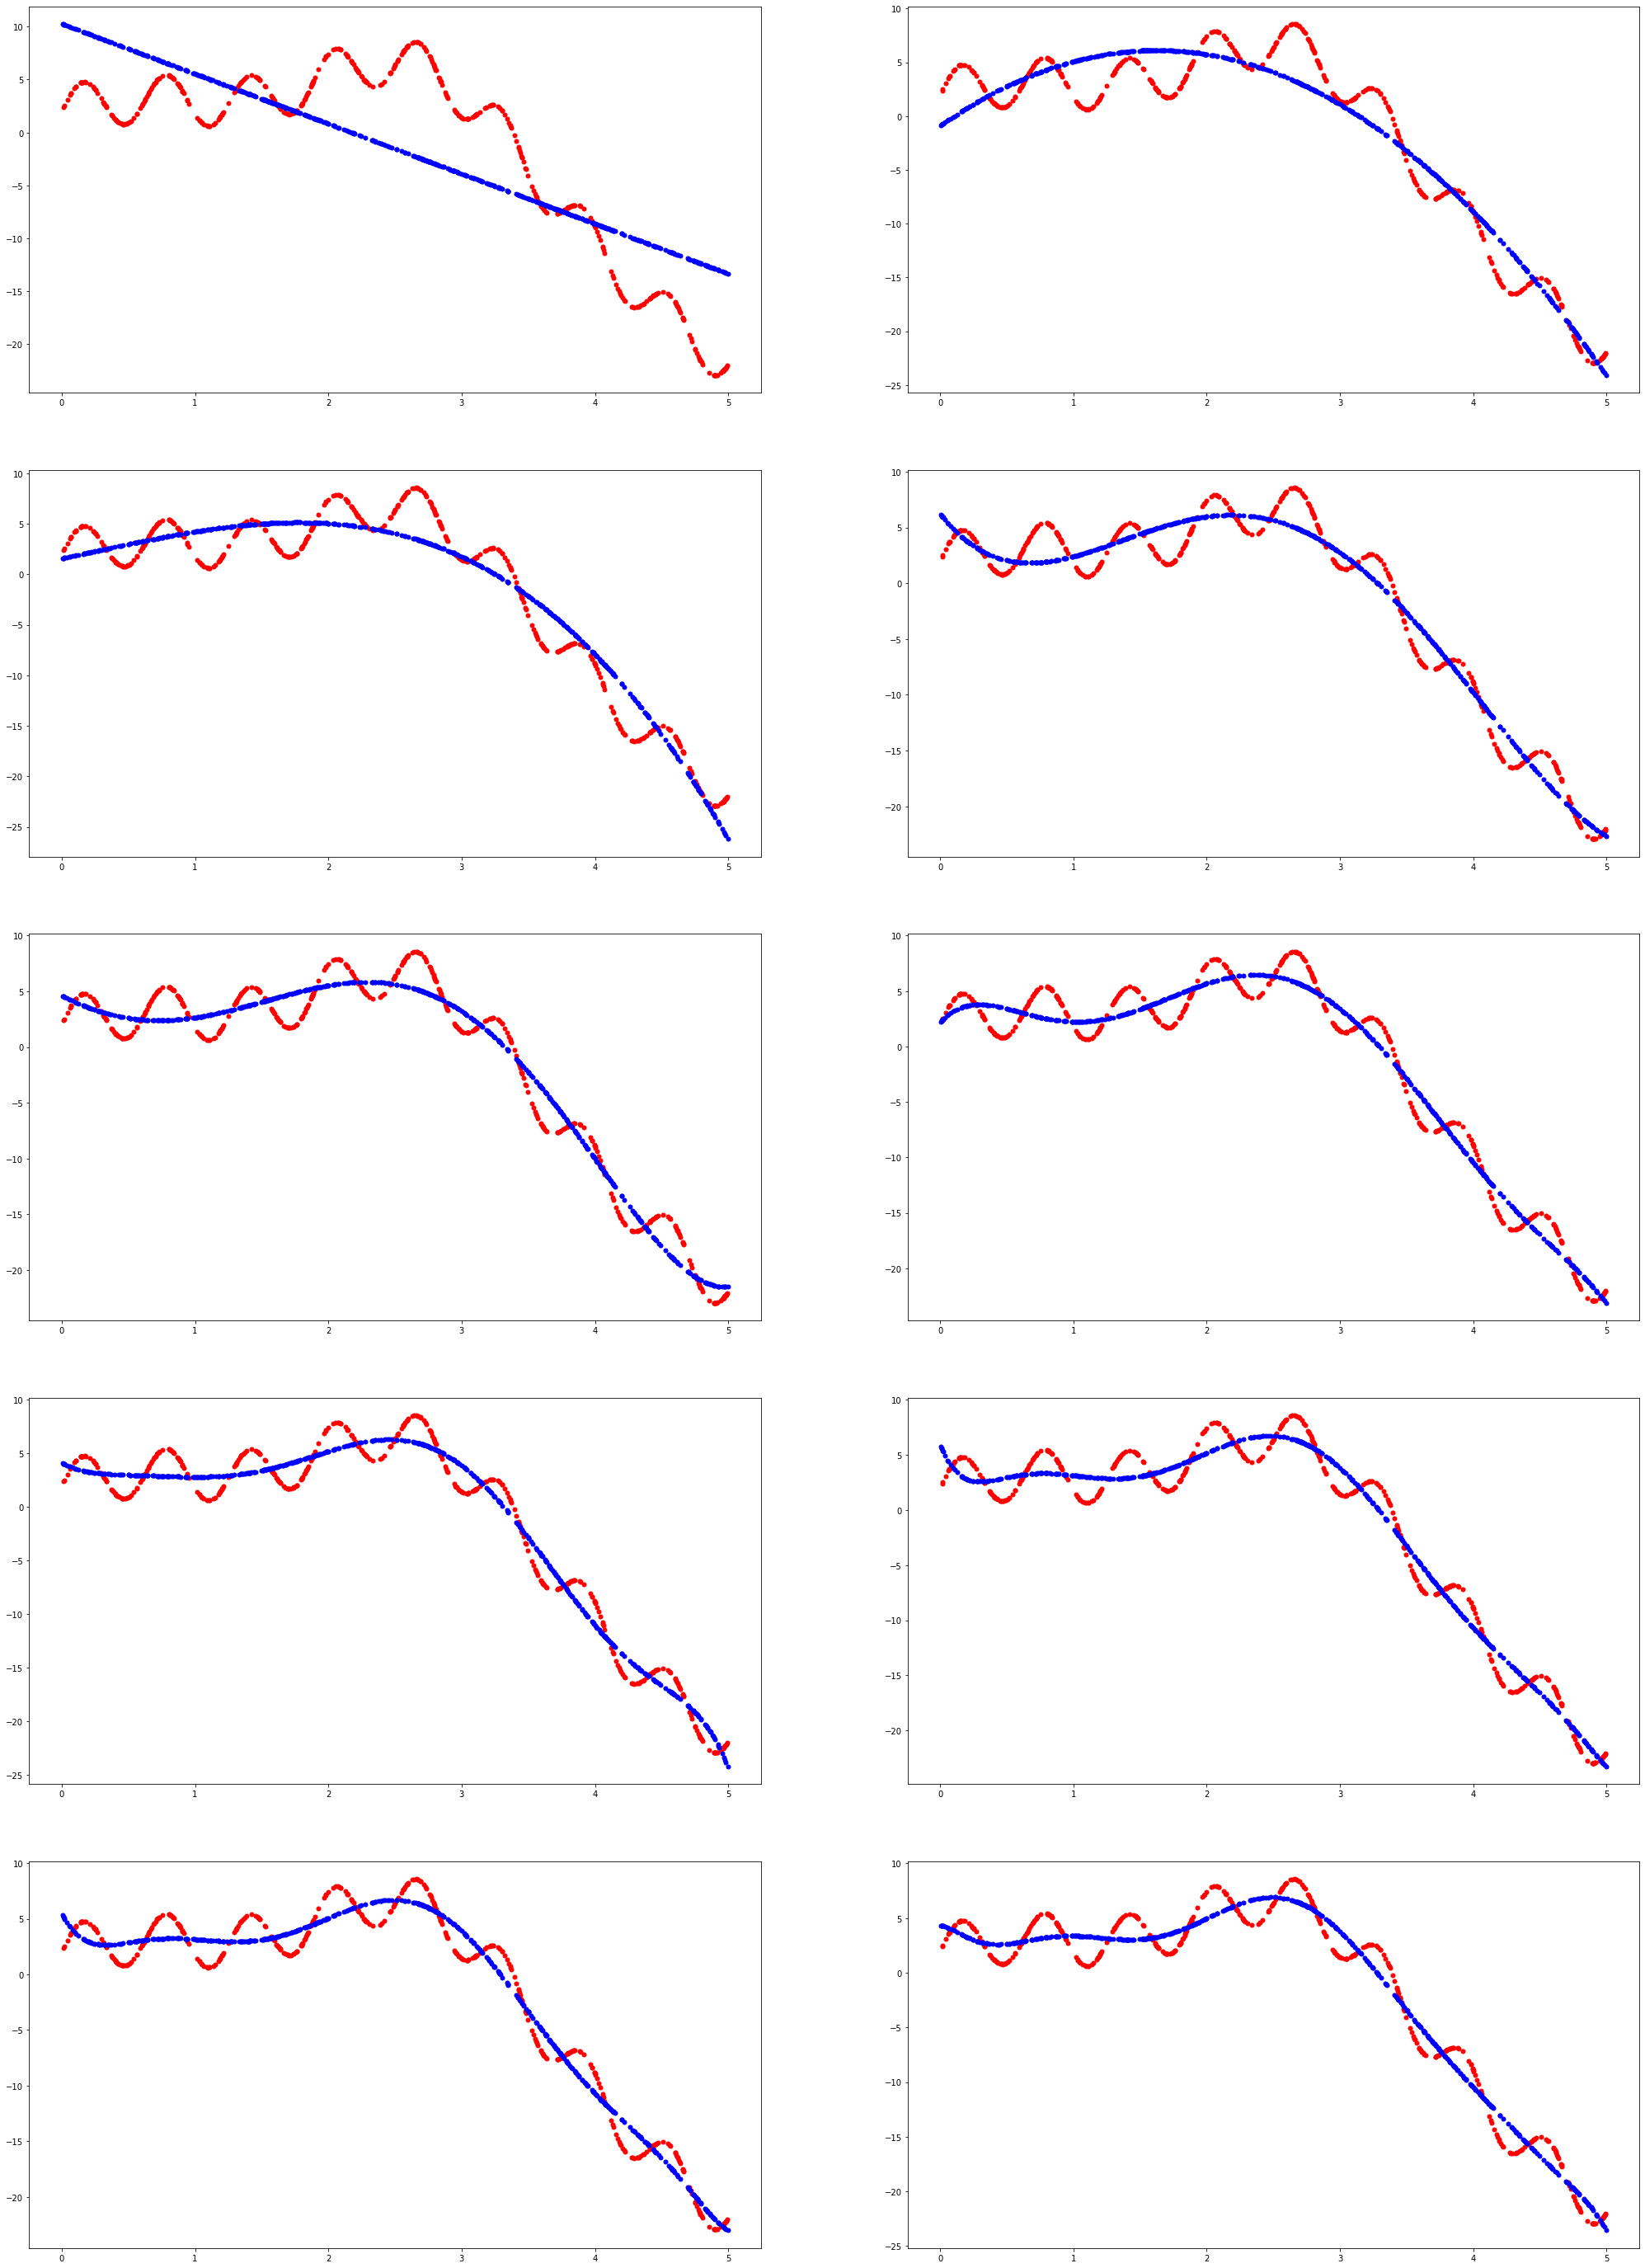

In [132]:
y_predicted = []
for i in range(10):
        print("Fold Number", i+1)
        fig, axes = plt.subplots(5, 2, figsize=(35, 50))
        x = x_folds[i]
        y = y_folds[i]
        temp = []
        for power in range(0, 10):
            #plot the points
            axes[int(power / 2)][int(power % 2)].plot(x, y, 'r.', markersize=10)
             
            poly_feat = PolynomialFeatures(degree = power + 1)
            features = poly_feat.fit_transform(x)
            poly_model = LinearRegression()
            poly_model.fit(features, y)
            y_test_predict = poly_model.predict(poly_feat.fit_transform(x_test[:, :]))
            
            axes[int(power / 2)][int(power % 2)].plot(x_test[:, :], y_test_predict, 'b.', markersize=10)
            temp.append(y_test_predict)
        y_predicted.append(temp)
        plt.show()

In [133]:
y_predicted[0][9]

array([  5.5699658 , -19.79584788,  -8.2286652 ,  -3.61544324,
         5.76878234,  -9.71837207,   5.97916106,   2.81329191,
         2.99177928,   3.10966597,   4.62198564,   2.81183222,
         3.9802126 , -11.79348199,  -8.35495013, -11.46062371,
         5.85839917,  -9.46042427,   4.69083198,   3.13245814,
         6.7665561 ,  -6.1598242 , -20.85906132,   2.24743158,
         3.28241044,   2.83167522, -18.97910179, -16.65009803,
         5.48994995,   0.98474688,   2.8080104 ,  -0.49037643,
         3.12981573,   2.80790745,   3.3946251 ,   3.54592815,
         4.25095776,   3.66846116,   2.88085457,   6.68210801,
         3.18611293,   6.25432844,  -1.3413967 ,   3.69746184,
       -15.35615851,   3.10082316,   3.01521306,   2.85423397,
       -10.60042029,  -6.67046179,  -7.21948206,  -0.22973875,
         3.03994883,   6.69127075,   5.41046827, -12.46148104,
       -11.75524864,   2.94034208,   3.54175907, -13.261455  ,
         2.96156995,   3.21202506,   4.21113435,  -0.40

In [134]:
def bias_variance(power):
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][power])
    y_predicted_part = np.asarray(y_predicted_part)
    bias = np.mean(np.abs(y_predicted_part - y_test), axis=0)
    variance = np.var(y_predicted_part, axis=0)
    return(np.mean(bias), np.mean(variance))

In [135]:
bias = []
variance = []
for i in range(0, 10):
    b, v = bias_variance(i)
    bias.append(b)
    variance.append(v)
print("Bias:", bias)
print("Variance:", variance)

Bias: [4.550234957008495, 2.0479295416687395, 1.9289849683135387, 1.5231881895654413, 1.511767022619498, 1.4133337639971812, 1.4135814927402792, 1.4021793984188415, 1.392362547080363, 1.387827015898316]
Variance: [0.11781878190889924, 0.03838825465995065, 0.04135933973745607, 0.02278317456030797, 0.02667508665542872, 0.02804777395901072, 0.037177013789657945, 0.044100762795178126, 0.048157981227162895, 0.053831991772314125]


In [136]:
final_table = dict()
final_table["Power"] = range(1, 11)
final_table["Bias"] = bias
final_table["Bias_Square"] = list(np.array(bias) ** 2)
final_table["Variance"] = variance
final_table["MSE"] = list(np.array(final_table["Bias_Square"]) + np.array(variance))
df = pd.DataFrame(final_table)
print(df)

   Power      Bias  Bias_Square  Variance        MSE
0      1  4.550235    20.704638  0.117819  20.822457
1      2  2.047930     4.194015  0.038388   4.232404
2      3  1.928985     3.720983  0.041359   3.762342
3      4  1.523188     2.320102  0.022783   2.342885
4      5  1.511767     2.285440  0.026675   2.312115
5      6  1.413334     1.997512  0.028048   2.025560
6      7  1.413581     1.998213  0.037177   2.035390
7      8  1.402179     1.966107  0.044101   2.010208
8      9  1.392363     1.938673  0.048158   1.986831
9     10  1.387827     1.926064  0.053832   1.979896


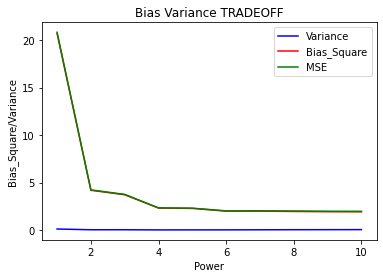

In [137]:
plt.plot(final_table["Power"], final_table["Variance"], color="blue")
plt.plot(final_table["Power"], final_table["Bias_Square"], color="red")
plt.plot(final_table["Power"], final_table["MSE"], color="green")
plt.title("Bias Variance TRADEOFF")
plt.xlabel("Power")
plt.ylabel("Bias_Square/Variance")
plt.legend(["Variance", "Bias_Square", "MSE"])
plt.show()

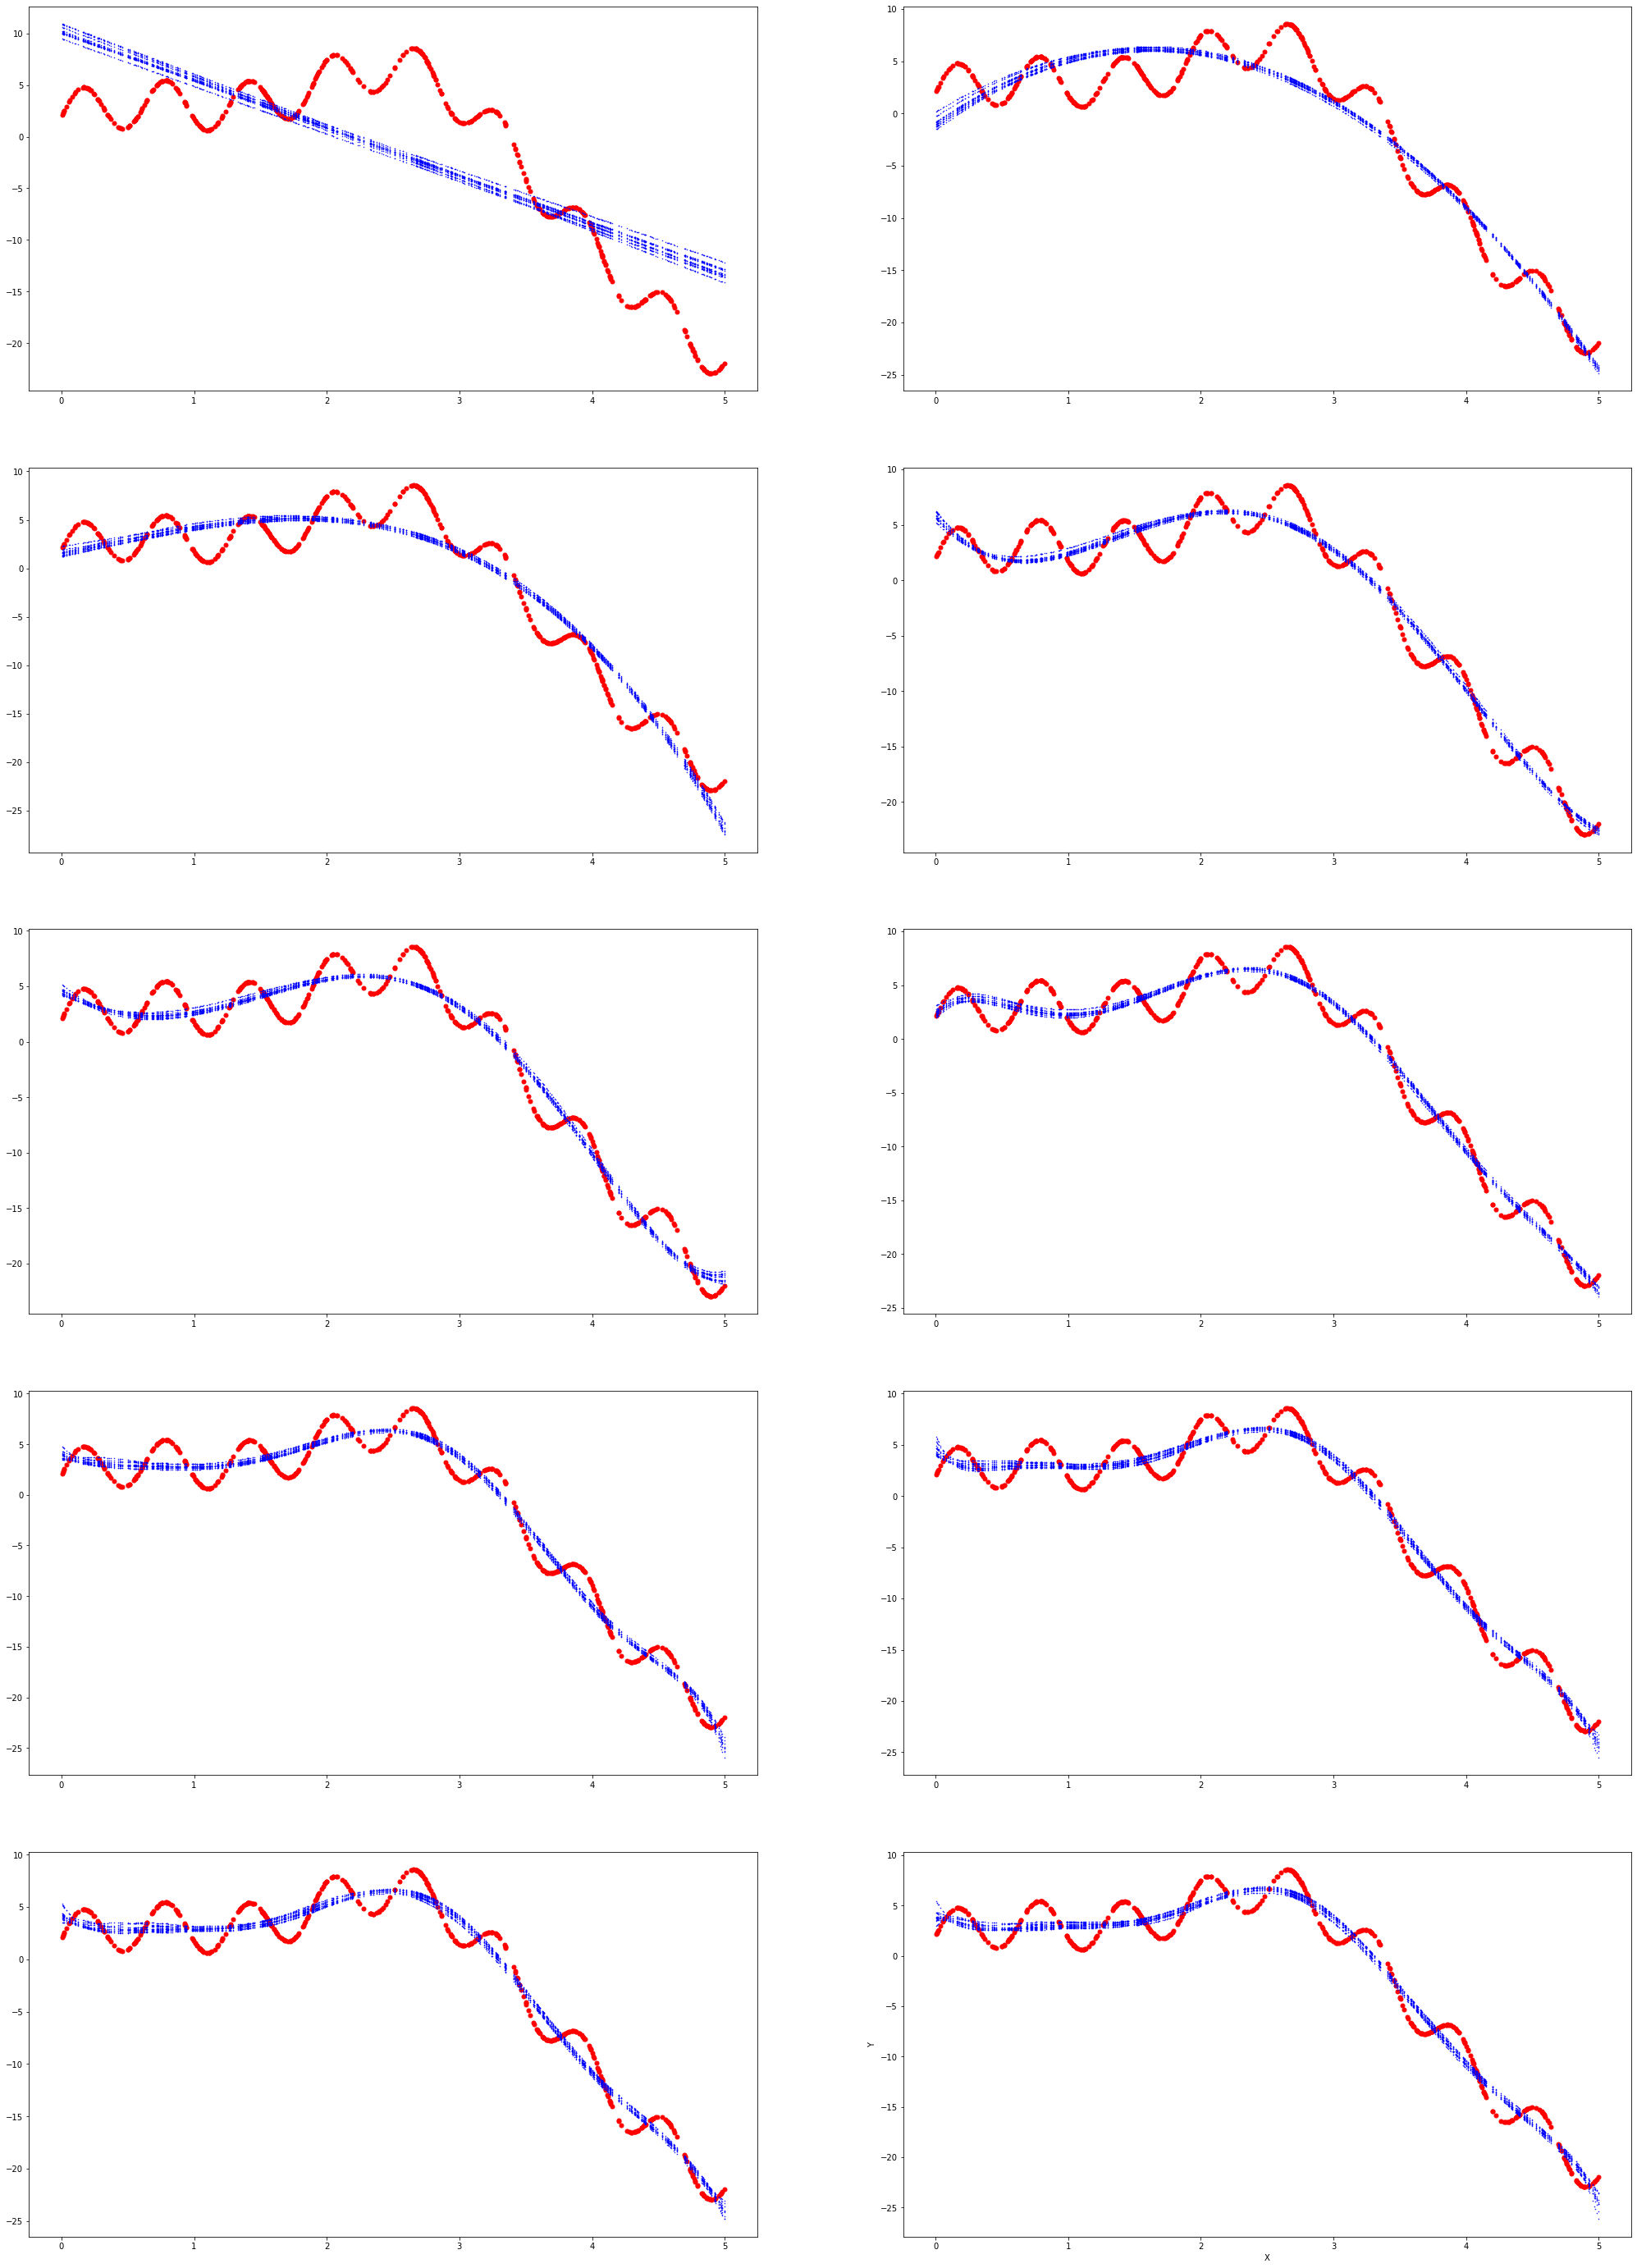

In [138]:
fig, axes = plt.subplots(5, 2, figsize=(35, 50))
for power in range(0, 10):
    xtemp = np.concatenate([x_test for i in range(10)])
    y_predicted_part = []
    for i in range(10):
        y_predicted_part.append(y_predicted[i][power])
    ytemp = np.array(y_predicted_part).reshape(-1)
    axes[int((power)/2)][int((power) % 2)].plot(x_test, y_test, 'r.', markersize=10)
    axes[int((power)/2)][int((power) % 2)].plot(xtemp, ytemp, 'b.', markersize=1)
plt.xlabel("X")
plt.ylabel("Y")
plt.show()